In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten    
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
#from keras.layers.convolutional import Convolution2D
#from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [1]:
# Clusters
import zipfile
with zipfile.ZipFile("customer_clusters.zip", 'r') as zip_ref:
    # printing all the contents of the zip file 
    zip_ref.printdir() 
  
    # extracting all the files 
    print('Extracting all the files') 
    zip_ref.extractall() 
    print('Done!') 

File Name                                             Modified             Size
timeseries_eight_clusters.csv                  2019-01-10 11:00:34      7695759
timeseries_features_three_clusters.csv         2019-01-10 10:55:06      7695759
timeseries_features_two_clusters.csv           2019-01-10 10:55:22      7695759
timeseries_fifteen_clusters.csv                2019-01-10 10:56:36      7696246
Extracting all the files
Done!


In [3]:
df = pd.read_csv("timeseries_eight_clusters.csv")
df.head()

/Users/anusha/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,

,Unnamed: 0,fv_cost,fv_cost.1,fv_cost.2,fv_cost.3,fv_cost.4,fv_cost.5,fv_cost.6,fv_cost.7,fv_cost.8,...,fv_cost.1453,fv_cost.1454,fv_cost.1455,fv_cost.1456,fv_cost.1457,fv_cost.1458,fv_cost.1459,fv_cost.1460,fv_cost.1461,cluster_lables
0,dates,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2017-12-24,2017-12-25,2017-12-26,2017-12-27,2017-12-28,2017-12-29,2017-12-30,2017-12-31,2018-01-01,NaN
1,id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1009141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.47896,-1.2677647,-1.0565412,-0.84528947,-0.6340095,-0.4227012,-0.21136473,0.0,0.211393,5.0
3,1010055,-4.391553,-3.568215,-2.7447665,-1.921208,-1.0975395,-0.27376094,0.5501278,1.3741267,2.1982358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,1018494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [4]:
# first take the lcusters and transpose the data
df.cluster_lables.describe()

count    847.000000
mean       5.540732
std        0.647184
min        1.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: cluster_lables, dtype: float64

In [5]:
for i in range(1,8):
    clust_i = df[df.cluster_lables == i]
    print (len(clust_i))
    


2
5
5
1
347
483
3


In [54]:
# only 2 big clusters in 8 clusters dataset
clust_5 = df[df.cluster_lables == 5]
clust_6 = df[df.cluster_lables == 6]
clust_dates = df.iloc[0]
#transpose of dataframe to have dates as rows and customers as colmns and values fv_cost
trans_clust_5 = clust_5.T
#print (trans_clust_5.head())
trans_clust_5.set_index(clust_dates,inplace=True)
trans_clust_5.columns = trans_clust_5.iloc[0]
trans_clust_5.columns = trans_clust_5.columns.get_level_values(0)
trans_clust_5=trans_clust_5.drop(trans_clust_5.index[0])
trans_clust_5 = trans_clust_5.reset_index()
# renaming column value
trans_clust_5.columns.values[[0]] = ['dates']
trans_clust_5



1009141
[0]
1463
0    2014-01-01
1    2014-01-02
2    2014-01-03
3    2014-01-04
4    2014-01-05
Name: dates, dtype: object


dates,dates,1009141,1010055,1018494,1050905,1062204,1068307,1070059,1076253,1078122,...,9698949,9706550,9723714,9748024,9830170,9875212,9882286,9906584,9911855,9976817
0,2014-01-01,0.0,-4.391553,0.0,-144.73338,0.0,-77.77693,0.0,-90.65799,0.0,...,0,0,0,0,0,0,-9.87685,-65.6805,0,0
1,2014-01-02,0.0,-3.568215,0.0,-138.16383,0.0,-74.07822,0.0,-85.27575,0.0,...,0,0,0,0,0,0,-38.792,-62.4336,0,0
2,2014-01-03,0.0,-2.7447665,0.0,-131.59338,0.0,-70.37901,0.0,-79.892784,0.0,...,0,0,0,0,0,0,-37.1162,-59.1863,0,0
3,2014-01-04,0.0,-1.921208,0.0,-125.02207,0.0,-66.679306,0.0,-74.5091,0.0,...,0,0,0,0,0,0,-35.4402,-55.9385,0,0
4,2014-01-05,0.0,-1.0975395,0.0,-118.449875,0.0,-62.979107,0.0,-69.1247,0.0,...,0,0,0,0,0,0,-33.764,-52.6903,0,0
5,2014-01-06,0.0,-0.27376094,0.0,-111.8768,0.0,-59.278416,0.0,-63.739582,0.0,...,0,0,0,0,0,0,-32.0875,-49.4416,0,0
6,2014-01-07,0.0,0.5501278,0.0,-105.30285,0.0,-55.57723,0.0,-58.35374,0.0,...,0,0,0,0,0,0,-24.4824,-46.1926,0,0
7,2014-01-08,0.0,1.3741267,0.0,-98.72801,0.0,-51.875546,0.0,-52.967182,0.0,...,0,0,0,0,0,0,-23.4638,-42.943,0,0
8,2014-01-09,0.0,2.1982358,0.0,-92.152306,0.0,-48.173367,0.0,-47.5799,0.0,...,0,0,0,0,0,0,-22.4452,-39.6931,0,0
9,2014-01-10,0.0,3.0224547,0.0,-85.575714,0.0,-44.470695,0.0,-42.1919,0.0,...,0,0,0,0,0,0,-21.4264,-36.4427,0,0


In [60]:
#split data into train and test
train_x = trans_clust_5[trans_clust_5['dates'].str.contains('2018-') == False]
test_x = trans_clust_5[(trans_clust_5['dates'].str.contains('2018-') == True) | (trans_clust_5['dates'].str.contains('2017-12') == True)]

1461
32
dates       dates 1009141     1010055 1018494      1050905 1062204  \
0      2014-01-01     0.0   -4.391553     0.0   -144.73338     0.0   
1      2014-01-02     0.0   -3.568215     0.0   -138.16383     0.0   
2      2014-01-03     0.0  -2.7447665     0.0   -131.59338     0.0   
3      2014-01-04     0.0   -1.921208     0.0   -125.02207     0.0   
4      2014-01-05     0.0  -1.0975395     0.0  -118.449875     0.0   

dates     1068307 1070059     1076253 1078122   ...   9698949 9706550 9723714  \
0       -77.77693     0.0   -90.65799     0.0   ...         0       0       0   
1       -74.07822     0.0   -85.27575     0.0   ...         0       0       0   
2       -70.37901     0.0  -79.892784     0.0   ...         0       0       0   
3      -66.679306     0.0    -74.5091     0.0   ...         0       0       0   
4      -62.979107     0.0    -69.1247     0.0   ...         0       0       0   

dates 9748024 9830170 9875212  9882286  9906584 9911855 9976817  
0           0     

In [67]:

def lag_feature(df, lag=1):
    if not type(df) == pd.DataFrame:
        df = pd.DataFrame(df, columns=['fv_cost'])
    
    def rename_lag(ser, j):
        ser.name = ser.name + f'_{j}'
        return ser
        
    # add a column lagged by `i` steps
    for i in range(1, lag + 1):
        df = df.join(df.fv_cost.shift(i).pipe(rename_lag, i))

    df.dropna(inplace=True)
    return df


def prepare_training_data(series_data, lag):
    " Converts a series of data into a lagged, scaled sample."
    # scale training data
    scaler = MinMaxScaler(feature_range=(-1, 1))
    cost_vals = scaler.fit_transform(series_data.values.reshape(-1, 1))
    
    # convert series to lagged features
    cost_lagged = lag_feature(cost_vals, lag=lag)

    # X, y format taking the first column (original time series) to be the y
    X = cost_lagged.drop('fv_cost', axis=1).values
    y = cost_lagged.fv_cost.values
    
    # keras expects 3 dimensional X
    X = X.reshape(X.shape[0], 1, X.shape[1])
    
    return X, y, scaler

In [68]:
# 3 lags for each data point as input to model
lag =  3

# model parameters
num_neurons = 24
batch_size = 1  # this forces the lstm to step through each time-step one at a time
batch_input_shape=(batch_size, 1, lag)

# instantiate a sequential model
model = Sequential()

#add convolution layer

#Convolution2D (https://keras.io/layers/convolutional/) expects the input to be in the format (samples, rows, cols, channels), 
#which is "channels-last". data is in the format (samples, channels, rows, cols). You should be able to fix
#this using the optional keyword data_format = 'channels_first' when declaring the Convolution2D layer else use
# input_shape=(3,1).
model.add(Conv1D(filters=24,batch_size=1, kernel_size=3, strides=3, padding="same",activation='relu',dilation_rate=1, input_shape=(1, 3),data_format='channels_first'))
model.add(MaxPooling1D(pool_size=3,strides=3, padding="same"))
model.add(Dropout(0.2))
#model.add(Flatten()) # as flatten is converting data into 1D but we need 3D for our 3lags data here

# add LSTM layer - stateful MUST be true here in 
# order to learn the patterns within a series
model.add(LSTM(units=num_neurons, 
              batch_input_shape=batch_input_shape, return_sequences=False,# as we only want last hidden output 
              stateful=True))

# followed by a dense layer with a single output for regression
model.add(Dense(1))
# we can add dropoutlayer after dense as well again
model.add(Dropout(0.2))
# compile
model.compile(loss='mean_absolute_error', optimizer='adam')

In [ ]:
#remove dates 

In [73]:
%%time
# build model over clust 5 customers where each column is a customer fv_cost
train_rmse =[]
test_rmse = []
actual_train_rmse = []
actual_error_scores_test = list()
for i in range(1,len(trans_clust_5.columns)):
#    cust_data = trans_clust_5.iloc[i]
    cust_id = trans_clust_5.columns[i]
    print ("customer number ",i)
    
    train_x_cust,train_y_cust, scalar_train = prepare_training_data(train_x.iloc[:,i], 3)
    test_x_cust,test_y_cust,scalar_test = prepare_training_data(test_x.iloc[:,i], 3)  
    model.fit(train_x_cust, train_y_cust, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)
    # input size should be divisible by batch size for stateful LSTM
    trainScore = model.evaluate(train_x_cust, train_y_cust, batch_size=1, verbose=2)
    #print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
    testScore = model.evaluate(test_x_cust, test_y_cust, batch_size=1, verbose=2)
    #print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    #print('unscaled test score %f MSE' %(scaler.inverse_transform(testScore)))
    train_rmse.append(trainScore)
    test_rmse.append(testScore)
    # generate predictions for training
    trainPredict = model.predict(train_x_cust,batch_size=1)
    testPredict = model.predict(test_x_cust,batch_size=1)
    yhat_act_test = scalar_test.inverse_transform(testPredict)
    # report performance
    rmse_test = sqrt(mean_squared_error(test_x.iloc[-(len(yhat_act_test)):,i], yhat_act_test))
    print(cust_id," Test RMSE: ",rmse_test)
    actual_error_scores_test.append(rmse_test)
    yhat_act_train = scalar_train.inverse_transform(trainScore)
    rmse_train = sqrt(mean_squared_error(train_x.iloc[-(len(yhat_act_train)):,i],yhat_act_train))
    actual_train_rmse.append(rmse_train)
    # write predictions into csv
    result_prediction = pd.DataFrame()#, original_fv : test_y_cust, prediction_fv :testPredict})
    #result_prediction['dates'] = test_x['dates']
    result_prediction['original_fv_scaled'] = test_y_cust
    result_prediction['prediction_scaled'] = testPredict
    result_prediction['prediction_actual'] = yhat_act_test
    result_prediction['fv_actual'] = test_x.iloc[-(len(yhat_act_test)):,i]
    result_prediction.to_csv("predictions_clusters/prediction_clust_5_347customers/predictions_for_client_"+str(cust_id)+".csv")
    i=i+1
    model.reset_states()

customer number  1
Epoch 1/10
 - 9s - loss: 0.1110
Epoch 2/10
 - 9s - loss: 0.0984
Epoch 3/10
 - 10s - loss: 0.1037
Epoch 4/10
 - 10s - loss: 0.1068
Epoch 5/10
 - 10s - loss: 0.0943
Epoch 6/10
 - 10s - loss: 0.1028
Epoch 7/10
 - 9s - loss: 0.1021
Epoch 8/10
 - 10s - loss: 0.0963
Epoch 9/10
 - 9s - loss: 0.0917
Epoch 10/10
 - 10s - loss: 0.0995
1009141  Test RMSE:  0.4594072187807574
customer number  2
Epoch 1/10
 - 9s - loss: 0.1957
Epoch 2/10
 - 9s - loss: 0.1974
Epoch 3/10
 - 10s - loss: 0.1812
Epoch 4/10
 - 10s - loss: 0.1899
Epoch 5/10
 - 9s - loss: 0.1878
Epoch 6/10
 - 10s - loss: 0.1909
Epoch 7/10
 - 9s - loss: 0.1895
Epoch 8/10
 - 9s - loss: 0.1752
Epoch 9/10
 - 9s - loss: 0.1886
Epoch 10/10
 - 9s - loss: 0.1965
1010055  Test RMSE:  0.24983564466871785
customer number  3
Epoch 1/10
 - 8s - loss: 0.1681
Epoch 2/10
 - 9s - loss: 0.1808
Epoch 3/10
 - 9s - loss: 0.1791
Epoch 4/10
 - 9s - loss: 0.1752
Epoch 5/10
 - 9s - loss: 0.1928
Epoch 6/10
 - 9s - loss: 0.1776
Epoch 7/10
 - 9s - 

 - 9s - loss: 0.0476
Epoch 6/10
 - 9s - loss: 0.0352
Epoch 7/10
 - 9s - loss: 0.0402
Epoch 8/10
 - 9s - loss: 0.0430
Epoch 9/10
 - 9s - loss: 0.0427
Epoch 10/10
 - 9s - loss: 0.0456
1229415  Test RMSE:  0.21720884918539168
customer number  23
Epoch 1/10
 - 9s - loss: 0.1159
Epoch 2/10
 - 8s - loss: 0.1244
Epoch 3/10
 - 9s - loss: 0.1224
Epoch 4/10
 - 9s - loss: 0.1278
Epoch 5/10
 - 9s - loss: 0.1258
Epoch 6/10
 - 9s - loss: 0.1341
Epoch 7/10
 - 9s - loss: 0.1208
Epoch 8/10
 - 8s - loss: 0.1229
Epoch 9/10
 - 9s - loss: 0.1155
Epoch 10/10
 - 9s - loss: 0.1277
1230527  Test RMSE:  0.30307478305721813
customer number  24
Epoch 1/10
 - 9s - loss: 0.2026
Epoch 2/10
 - 8s - loss: 0.2004
Epoch 3/10
 - 9s - loss: 0.1886
Epoch 4/10
 - 9s - loss: 0.2104
Epoch 5/10
 - 9s - loss: 0.2063
Epoch 6/10
 - 9s - loss: 0.2169
Epoch 7/10
 - 9s - loss: 0.2151
Epoch 8/10
 - 9s - loss: 0.2047
Epoch 9/10
 - 9s - loss: 0.2067
Epoch 10/10
 - 9s - loss: 0.1881
1238783  Test RMSE:  0.17043039016435935
customer numb

1419335  Test RMSE:  7.29553185782252
customer number  44
Epoch 1/10
 - 9s - loss: 0.1928
Epoch 2/10
 - 9s - loss: 0.2058
Epoch 3/10
 - 9s - loss: 0.2022
Epoch 4/10
 - 9s - loss: 0.1947
Epoch 5/10
 - 9s - loss: 0.2060
Epoch 6/10
 - 9s - loss: 0.2061
Epoch 7/10
 - 9s - loss: 0.1852
Epoch 8/10
 - 9s - loss: 0.2158
Epoch 9/10
 - 9s - loss: 0.2177
Epoch 10/10
 - 9s - loss: 0.2117
1451200  Test RMSE:  0.20991760292444303
customer number  45
Epoch 1/10
 - 9s - loss: 0.1869
Epoch 2/10
 - 9s - loss: 0.1826
Epoch 3/10
 - 9s - loss: 0.2051
Epoch 4/10
 - 9s - loss: 0.1950
Epoch 5/10
 - 9s - loss: 0.2003
Epoch 6/10
 - 9s - loss: 0.1847
Epoch 7/10
 - 9s - loss: 0.1988
Epoch 8/10
 - 9s - loss: 0.1766
Epoch 9/10
 - 9s - loss: 0.1854
Epoch 10/10
 - 9s - loss: 0.1857
1455832  Test RMSE:  0.21661931027753337
customer number  46
Epoch 1/10
 - 9s - loss: 0.1694
Epoch 2/10
 - 9s - loss: 0.1623
Epoch 3/10
 - 9s - loss: 0.1613
Epoch 4/10
 - 9s - loss: 0.1770
Epoch 5/10
 - 9s - loss: 0.1647
Epoch 6/10
 - 8s -

Epoch 5/10
 - 9s - loss: 0.2000
Epoch 6/10
 - 9s - loss: 0.1969
Epoch 7/10
 - 9s - loss: 0.1930
Epoch 8/10
 - 9s - loss: 0.1948
Epoch 9/10
 - 9s - loss: 0.2162
Epoch 10/10
 - 9s - loss: 0.2179
1651452  Test RMSE:  0.2585493882933324
customer number  66
Epoch 1/10
 - 9s - loss: 0.0712
Epoch 2/10
 - 9s - loss: 0.0702
Epoch 3/10
 - 9s - loss: 0.0653
Epoch 4/10
 - 9s - loss: 0.0658
Epoch 5/10
 - 9s - loss: 0.0725
Epoch 6/10
 - 9s - loss: 0.0670
Epoch 7/10
 - 9s - loss: 0.0668
Epoch 8/10
 - 9s - loss: 0.0729
Epoch 9/10
 - 9s - loss: 0.0650
Epoch 10/10
 - 9s - loss: 0.0662
1677099  Test RMSE:  0.4968459326437793
customer number  67
Epoch 1/10
 - 9s - loss: 0.1803
Epoch 2/10
 - 9s - loss: 0.1903
Epoch 3/10
 - 9s - loss: 0.1804
Epoch 4/10
 - 9s - loss: 0.1782
Epoch 5/10
 - 9s - loss: 0.1590
Epoch 6/10
 - 9s - loss: 0.1751
Epoch 7/10
 - 9s - loss: 0.1747
Epoch 8/10
 - 9s - loss: 0.1673
Epoch 9/10
 - 9s - loss: 0.1869
Epoch 10/10
 - 9s - loss: 0.1914
1678636  Test RMSE:  0.1751710053171337
custo

1863028  Test RMSE:  0.28456283384715636
customer number  87
Epoch 1/10
 - 9s - loss: 0.1953
Epoch 2/10
 - 9s - loss: 0.2112
Epoch 3/10
 - 9s - loss: 0.1987
Epoch 4/10
 - 9s - loss: 0.1974
Epoch 5/10
 - 9s - loss: 0.1964
Epoch 6/10
 - 9s - loss: 0.1967
Epoch 7/10
 - 9s - loss: 0.1968
Epoch 8/10
 - 9s - loss: 0.2067
Epoch 9/10
 - 9s - loss: 0.1986
Epoch 10/10
 - 8s - loss: 0.1892
1876562  Test RMSE:  0.2143068078689664
customer number  88
Epoch 1/10
 - 9s - loss: 0.1762
Epoch 2/10
 - 9s - loss: 0.1760
Epoch 3/10
 - 9s - loss: 0.1794
Epoch 4/10
 - 9s - loss: 0.1747
Epoch 5/10
 - 9s - loss: 0.1546
Epoch 6/10
 - 9s - loss: 0.1690
Epoch 7/10
 - 9s - loss: 0.1548
Epoch 8/10
 - 9s - loss: 0.1600
Epoch 9/10
 - 9s - loss: 0.1775
Epoch 10/10
 - 9s - loss: 0.1699
1880826  Test RMSE:  0.2565195465962274
customer number  89
Epoch 1/10
 - 9s - loss: 0.2015
Epoch 2/10
 - 9s - loss: 0.2184
Epoch 3/10
 - 9s - loss: 0.2042
Epoch 4/10
 - 9s - loss: 0.2055
Epoch 5/10
 - 9s - loss: 0.2001
Epoch 6/10
 - 9s 

Epoch 5/10
 - 9s - loss: 0.2154
Epoch 6/10
 - 9s - loss: 0.2205
Epoch 7/10
 - 9s - loss: 0.2156
Epoch 8/10
 - 9s - loss: 0.1943
Epoch 9/10
 - 9s - loss: 0.1846
Epoch 10/10
 - 9s - loss: 0.2047
2048697  Test RMSE:  0.2402190529877226
customer number  109
Epoch 1/10
 - 9s - loss: 0.1894
Epoch 2/10
 - 9s - loss: 0.1947
Epoch 3/10
 - 9s - loss: 0.2060
Epoch 4/10
 - 9s - loss: 0.1917
Epoch 5/10
 - 9s - loss: 0.1840
Epoch 6/10
 - 9s - loss: 0.2041
Epoch 7/10
 - 9s - loss: 0.1940
Epoch 8/10
 - 9s - loss: 0.2035
Epoch 9/10
 - 9s - loss: 0.2098
Epoch 10/10
 - 9s - loss: 0.2162
2049194  Test RMSE:  0.37045716710335785
customer number  110
Epoch 1/10
 - 9s - loss: 0.1856
Epoch 2/10
 - 9s - loss: 0.2095
Epoch 3/10
 - 9s - loss: 0.1995
Epoch 4/10
 - 9s - loss: 0.2059
Epoch 5/10
 - 9s - loss: 0.2057
Epoch 6/10
 - 9s - loss: 0.1962
Epoch 7/10
 - 9s - loss: 0.2048
Epoch 8/10
 - 9s - loss: 0.2067
Epoch 9/10
 - 9s - loss: 0.1791
Epoch 10/10
 - 9s - loss: 0.1953
2049241  Test RMSE:  0.2598890579098481
cu

 - 9s - loss: 0.0572
3443043  Test RMSE:  0.26242402298820855
customer number  130
Epoch 1/10
 - 9s - loss: 0.0884
Epoch 2/10
 - 9s - loss: 0.0968
Epoch 3/10
 - 9s - loss: 0.0928
Epoch 4/10
 - 9s - loss: 0.0878
Epoch 5/10
 - 9s - loss: 0.0898
Epoch 6/10
 - 9s - loss: 0.0926
Epoch 7/10
 - 9s - loss: 0.0905
Epoch 8/10
 - 8s - loss: 0.1019
Epoch 9/10
 - 9s - loss: 0.0940
Epoch 10/10
 - 9s - loss: 0.0972
3443485  Test RMSE:  0.09196506258414981
customer number  131
Epoch 1/10
 - 9s - loss: 0.1211
Epoch 2/10
 - 9s - loss: 0.1244
Epoch 3/10
 - 9s - loss: 0.1161
Epoch 4/10
 - 9s - loss: 0.1192
Epoch 5/10
 - 9s - loss: 0.1148
Epoch 6/10
 - 9s - loss: 0.1075
Epoch 7/10
 - 9s - loss: 0.1172
Epoch 8/10
 - 9s - loss: 0.1180
Epoch 9/10
 - 9s - loss: 0.1121
Epoch 10/10
 - 9s - loss: 0.1139
3445933  Test RMSE:  0.27586707917173264
customer number  132
Epoch 1/10
 - 9s - loss: 0.0380
Epoch 2/10
 - 9s - loss: 0.0334
Epoch 3/10
 - 9s - loss: 0.0385
Epoch 4/10
 - 9s - loss: 0.0372
Epoch 5/10
 - 8s - loss

Epoch 4/10
 - 9s - loss: 0.0493
Epoch 5/10
 - 9s - loss: 0.0505
Epoch 6/10
 - 9s - loss: 0.0492
Epoch 7/10
 - 9s - loss: 0.0488
Epoch 8/10
 - 9s - loss: 0.0489
Epoch 9/10
 - 9s - loss: 0.0514
Epoch 10/10
 - 9s - loss: 0.0471
4679652  Test RMSE:  0.28016504003911075
customer number  152
Epoch 1/10
 - 9s - loss: 0.1994
Epoch 2/10
 - 9s - loss: 0.1850
Epoch 3/10
 - 9s - loss: 0.1915
Epoch 4/10
 - 9s - loss: 0.1935
Epoch 5/10
 - 9s - loss: 0.2081
Epoch 6/10
 - 9s - loss: 0.1931
Epoch 7/10
 - 9s - loss: 0.1794
Epoch 8/10
 - 9s - loss: 0.1800
Epoch 9/10
 - 9s - loss: 0.1851
Epoch 10/10
 - 9s - loss: 0.2056
4710037  Test RMSE:  0.06099172711810493
customer number  153
Epoch 1/10
 - 9s - loss: 0.2032
Epoch 2/10
 - 9s - loss: 0.1987
Epoch 3/10
 - 9s - loss: 0.1981
Epoch 4/10
 - 9s - loss: 0.2015
Epoch 5/10
 - 9s - loss: 0.1867
Epoch 6/10
 - 9s - loss: 0.2071
Epoch 7/10
 - 9s - loss: 0.1870
Epoch 8/10
 - 9s - loss: 0.1932
Epoch 9/10
 - 9s - loss: 0.1842
Epoch 10/10
 - 9s - loss: 0.1896
4796063  

 - 9s - loss: 0.0874
Epoch 10/10
 - 9s - loss: 0.0894
5943620  Test RMSE:  0.28491314422466996
customer number  173
Epoch 1/10
 - 9s - loss: 0.2043
Epoch 2/10
 - 9s - loss: 0.2035
Epoch 3/10
 - 9s - loss: 0.1969
Epoch 4/10
 - 9s - loss: 0.2139
Epoch 5/10
 - 9s - loss: 0.1964
Epoch 6/10
 - 9s - loss: 0.2046
Epoch 7/10
 - 9s - loss: 0.2081
Epoch 8/10
 - 8s - loss: 0.2182
Epoch 9/10
 - 9s - loss: 0.2129
Epoch 10/10
 - 9s - loss: 0.2129
5981387  Test RMSE:  0.16282427310943604
customer number  174
Epoch 1/10
 - 9s - loss: 0.0244
Epoch 2/10
 - 9s - loss: 0.0228
Epoch 3/10
 - 9s - loss: 0.0247
Epoch 4/10
 - 9s - loss: 0.0239
Epoch 5/10
 - 9s - loss: 0.0215
Epoch 6/10
 - 9s - loss: 0.0242
Epoch 7/10
 - 9s - loss: 0.0266
Epoch 8/10
 - 9s - loss: 0.0258
Epoch 9/10
 - 9s - loss: 0.0239
Epoch 10/10
 - 9s - loss: 0.0278
6039103  Test RMSE:  0.20792649102503832
customer number  175
Epoch 1/10
 - 9s - loss: 0.2083
Epoch 2/10
 - 9s - loss: 0.1942
Epoch 3/10
 - 9s - loss: 0.1989
Epoch 4/10
 - 9s - los

Epoch 3/10
 - 9s - loss: 0.2024
Epoch 4/10
 - 9s - loss: 0.2141
Epoch 5/10
 - 9s - loss: 0.1861
Epoch 6/10
 - 9s - loss: 0.1871
Epoch 7/10
 - 9s - loss: 0.1893
Epoch 8/10
 - 9s - loss: 0.2243
Epoch 9/10
 - 9s - loss: 0.2093
Epoch 10/10
 - 9s - loss: 0.1986
7442823  Test RMSE:  0.13017685951494323
customer number  195
Epoch 1/10
 - 9s - loss: 0.1647
Epoch 2/10
 - 9s - loss: 0.1628
Epoch 3/10
 - 9s - loss: 0.1522
Epoch 4/10
 - 9s - loss: 0.1618
Epoch 5/10
 - 9s - loss: 0.1639
Epoch 6/10
 - 9s - loss: 0.1559
Epoch 7/10
 - 9s - loss: 0.1518
Epoch 8/10
 - 9s - loss: 0.1515
Epoch 9/10
 - 9s - loss: 0.1490
Epoch 10/10
 - 9s - loss: 0.1491
7525834  Test RMSE:  4.038276219180386
customer number  196
Epoch 1/10
 - 9s - loss: 0.1972
Epoch 2/10
 - 9s - loss: 0.2001
Epoch 3/10
 - 9s - loss: 0.1874
Epoch 4/10
 - 9s - loss: 0.1949
Epoch 5/10
 - 9s - loss: 0.2054
Epoch 6/10
 - 9s - loss: 0.2066
Epoch 7/10
 - 9s - loss: 0.1805
Epoch 8/10
 - 9s - loss: 0.1943
Epoch 9/10
 - 9s - loss: 0.2026
Epoch 10/10


 - 9s - loss: 0.0927
Epoch 9/10
 - 8s - loss: 0.0920
Epoch 10/10
 - 9s - loss: 0.0860
7710372  Test RMSE:  0.2628775827323192
customer number  216
Epoch 1/10
 - 9s - loss: 0.1420
Epoch 2/10
 - 9s - loss: 0.1417
Epoch 3/10
 - 9s - loss: 0.1267
Epoch 4/10
 - 9s - loss: 0.1326
Epoch 5/10
 - 9s - loss: 0.1291
Epoch 6/10
 - 9s - loss: 0.1312
Epoch 7/10
 - 9s - loss: 0.1313
Epoch 8/10
 - 9s - loss: 0.1350
Epoch 9/10
 - 8s - loss: 0.1360
Epoch 10/10
 - 9s - loss: 0.1341
7719337  Test RMSE:  0.25943108484346156
customer number  217
Epoch 1/10
 - 9s - loss: 0.1766
Epoch 2/10
 - 9s - loss: 0.1996
Epoch 3/10
 - 9s - loss: 0.1930
Epoch 4/10
 - 8s - loss: 0.2012
Epoch 5/10
 - 9s - loss: 0.2164
Epoch 6/10
 - 9s - loss: 0.2015
Epoch 7/10
 - 9s - loss: 0.1938
Epoch 8/10
 - 9s - loss: 0.1999
Epoch 9/10
 - 9s - loss: 0.1991
Epoch 10/10
 - 9s - loss: 0.1915
7755945  Test RMSE:  0.22587993646734583
customer number  218
Epoch 1/10
 - 9s - loss: 0.2098
Epoch 2/10
 - 9s - loss: 0.1967
Epoch 3/10
 - 9s - loss

Epoch 2/10
 - 9s - loss: 0.0351
Epoch 3/10
 - 9s - loss: 0.0323
Epoch 4/10
 - 9s - loss: 0.0332
Epoch 5/10
 - 9s - loss: 0.0312
Epoch 6/10
 - 9s - loss: 0.0335
Epoch 7/10
 - 9s - loss: 0.0326
Epoch 8/10
 - 9s - loss: 0.0309
Epoch 9/10
 - 9s - loss: 0.0330
Epoch 10/10
 - 9s - loss: 0.0337
7983220  Test RMSE:  21.44310266338368
customer number  238
Epoch 1/10
 - 9s - loss: 0.1420
Epoch 2/10
 - 9s - loss: 0.1441
Epoch 3/10
 - 8s - loss: 0.1397
Epoch 4/10
 - 9s - loss: 0.1313
Epoch 5/10
 - 9s - loss: 0.1311
Epoch 6/10
 - 9s - loss: 0.1309
Epoch 7/10
 - 9s - loss: 0.1284
Epoch 8/10
 - 9s - loss: 0.1342
Epoch 9/10
 - 9s - loss: 0.1295
Epoch 10/10
 - 9s - loss: 0.1333
7985789  Test RMSE:  0.2790534539407614
customer number  239
Epoch 1/10
 - 9s - loss: 0.1937
Epoch 2/10
 - 9s - loss: 0.1849
Epoch 3/10
 - 9s - loss: 0.1942
Epoch 4/10
 - 9s - loss: 0.1967
Epoch 5/10
 - 9s - loss: 0.1928
Epoch 6/10
 - 8s - loss: 0.1784
Epoch 7/10
 - 9s - loss: 0.2011
Epoch 8/10
 - 9s - loss: 0.1875
Epoch 9/10
 -

 - 9s - loss: 0.0585
Epoch 8/10
 - 9s - loss: 0.0623
Epoch 9/10
 - 9s - loss: 0.0618
Epoch 10/10
 - 9s - loss: 0.0602
8122857  Test RMSE:  1.2905314828836616
customer number  259
Epoch 1/10
 - 9s - loss: 0.2211
Epoch 2/10
 - 9s - loss: 0.2110
Epoch 3/10
 - 9s - loss: 0.1989
Epoch 4/10
 - 9s - loss: 0.2083
Epoch 5/10
 - 9s - loss: 0.1963
Epoch 6/10
 - 9s - loss: 0.2080
Epoch 7/10
 - 9s - loss: 0.1928
Epoch 8/10
 - 9s - loss: 0.2012
Epoch 9/10
 - 9s - loss: 0.1843
Epoch 10/10
 - 9s - loss: 0.1990
8124507  Test RMSE:  0.2145536836312149
customer number  260
Epoch 1/10
 - 9s - loss: 0.0823
Epoch 2/10
 - 9s - loss: 0.0792
Epoch 3/10
 - 9s - loss: 0.0843
Epoch 4/10
 - 9s - loss: 0.0808
Epoch 5/10
 - 9s - loss: 0.0778
Epoch 6/10
 - 9s - loss: 0.0798
Epoch 7/10
 - 9s - loss: 0.0825
Epoch 8/10
 - 9s - loss: 0.0799
Epoch 9/10
 - 9s - loss: 0.0787
Epoch 10/10
 - 9s - loss: 0.0838
8124701  Test RMSE:  0.29135920607515
customer number  261
Epoch 1/10
 - 9s - loss: 0.0503
Epoch 2/10
 - 9s - loss: 0.

 - 9s - loss: 0.0622
Epoch 2/10
 - 8s - loss: 0.0660
Epoch 3/10
 - 9s - loss: 0.0585
Epoch 4/10
 - 9s - loss: 0.0636
Epoch 5/10
 - 9s - loss: 0.0690
Epoch 6/10
 - 9s - loss: 0.0651
Epoch 7/10
 - 9s - loss: 0.0602
Epoch 8/10
 - 8s - loss: 0.0681
Epoch 9/10
 - 9s - loss: 0.0635
Epoch 10/10
 - 9s - loss: 0.0629
8227322  Test RMSE:  0.27788384612524314
customer number  281
Epoch 1/10
 - 9s - loss: 0.1034
Epoch 2/10
 - 9s - loss: 0.1057
Epoch 3/10
 - 9s - loss: 0.1030
Epoch 4/10
 - 9s - loss: 0.1038
Epoch 5/10
 - 9s - loss: 0.1079
Epoch 6/10
 - 9s - loss: 0.1180
Epoch 7/10
 - 9s - loss: 0.1031
Epoch 8/10
 - 9s - loss: 0.1028
Epoch 9/10
 - 9s - loss: 0.0964
Epoch 10/10
 - 9s - loss: 0.1143
8240345  Test RMSE:  0.2550256804213531
customer number  282
Epoch 1/10
 - 9s - loss: 0.1940
Epoch 2/10
 - 9s - loss: 0.1976
Epoch 3/10
 - 9s - loss: 0.1860
Epoch 4/10
 - 9s - loss: 0.1891
Epoch 5/10
 - 9s - loss: 0.1987
Epoch 6/10
 - 9s - loss: 0.1853
Epoch 7/10
 - 9s - loss: 0.2122
Epoch 8/10
 - 9s - los

Epoch 7/10
 - 9s - loss: 0.0957
Epoch 8/10
 - 9s - loss: 0.1023
Epoch 9/10
 - 8s - loss: 0.0960
Epoch 10/10
 - 9s - loss: 0.0907
8433690  Test RMSE:  0.2702498137950897
customer number  302
Epoch 1/10
 - 9s - loss: 0.1864
Epoch 2/10
 - 9s - loss: 0.1732
Epoch 3/10
 - 8s - loss: 0.1762
Epoch 4/10
 - 9s - loss: 0.1774
Epoch 5/10
 - 9s - loss: 0.1639
Epoch 6/10
 - 9s - loss: 0.1733
Epoch 7/10
 - 9s - loss: 0.1720
Epoch 8/10
 - 9s - loss: 0.1801
Epoch 9/10
 - 9s - loss: 0.1974
Epoch 10/10
 - 9s - loss: 0.1747
8434948  Test RMSE:  0.3196873873712863
customer number  303
Epoch 1/10
 - 9s - loss: 0.1946
Epoch 2/10
 - 9s - loss: 0.1889
Epoch 3/10
 - 9s - loss: 0.1886
Epoch 4/10
 - 9s - loss: 0.2044
Epoch 5/10
 - 9s - loss: 0.1979
Epoch 6/10
 - 9s - loss: 0.1993
Epoch 7/10
 - 9s - loss: 0.1922
Epoch 8/10
 - 9s - loss: 0.1959
Epoch 9/10
 - 9s - loss: 0.1757
Epoch 10/10
 - 9s - loss: 0.1805
8454256  Test RMSE:  0.3136851550271793
customer number  304
Epoch 1/10
 - 9s - loss: 0.0230
Epoch 2/10
 - 

 - 9s - loss: 0.1164
Epoch 2/10
 - 9s - loss: 0.1141
Epoch 3/10
 - 9s - loss: 0.1088
Epoch 4/10
 - 9s - loss: 0.1119
Epoch 5/10
 - 9s - loss: 0.1119
Epoch 6/10
 - 9s - loss: 0.1115
Epoch 7/10
 - 9s - loss: 0.1124
Epoch 8/10
 - 9s - loss: 0.1106
Epoch 9/10
 - 9s - loss: 0.1156
Epoch 10/10
 - 9s - loss: 0.1065
8629781  Test RMSE:  6.0447183747871165
customer number  324
Epoch 1/10
 - 9s - loss: 0.2036
Epoch 2/10
 - 9s - loss: 0.2641
Epoch 3/10
 - 9s - loss: 0.1942
Epoch 4/10
 - 9s - loss: 0.1922
Epoch 5/10
 - 9s - loss: 0.1920
Epoch 6/10
 - 9s - loss: 0.2026
Epoch 7/10
 - 9s - loss: 0.2019
Epoch 8/10
 - 9s - loss: 0.2098
Epoch 9/10
 - 9s - loss: 0.2191
Epoch 10/10
 - 9s - loss: 0.2108
8636656  Test RMSE:  136.82009067470045
customer number  325
Epoch 1/10
 - 9s - loss: 0.1807
Epoch 2/10
 - 9s - loss: 0.1630
Epoch 3/10
 - 9s - loss: 0.1874
Epoch 4/10
 - 9s - loss: 0.1879
Epoch 5/10
 - 9s - loss: 0.1895
Epoch 6/10
 - 9s - loss: 0.1743
Epoch 7/10
 - 9s - loss: 0.1783
Epoch 8/10
 - 8s - loss

Epoch 7/10
 - 9s - loss: 0.0534
Epoch 8/10
 - 9s - loss: 0.0549
Epoch 9/10
 - 9s - loss: 0.0544
Epoch 10/10
 - 9s - loss: 0.0563
9882286  Test RMSE:  12.230548261232249
customer number  345
Epoch 1/10
 - 9s - loss: 0.1750
Epoch 2/10
 - 9s - loss: 0.1699
Epoch 3/10
 - 9s - loss: 0.1676
Epoch 4/10
 - 9s - loss: 0.1810
Epoch 5/10
 - 9s - loss: 0.1788
Epoch 6/10
 - 9s - loss: 0.1815
Epoch 7/10
 - 9s - loss: 0.1852
Epoch 8/10
 - 9s - loss: 0.1771
Epoch 9/10
 - 9s - loss: 0.1824
Epoch 10/10
 - 9s - loss: 0.1844
9906584  Test RMSE:  43.165727818778514
customer number  346
Epoch 1/10
 - 9s - loss: 0.0824
Epoch 2/10
 - 9s - loss: 0.0785
Epoch 3/10
 - 9s - loss: 0.0779
Epoch 4/10
 - 9s - loss: 0.0877
Epoch 5/10
 - 9s - loss: 0.0836
Epoch 6/10
 - 8s - loss: 0.0823
Epoch 7/10
 - 9s - loss: 0.0770
Epoch 8/10
 - 9s - loss: 0.0748
Epoch 9/10
 - 9s - loss: 0.0805
Epoch 10/10
 - 9s - loss: 0.0807
9911855  Test RMSE:  2.650263416156985
customer number  347
Epoch 1/10
 - 9s - loss: 0.0544
Epoch 2/10
 - 9

ValueError: shape mismatch: objects cannot be broadcast to a single shape

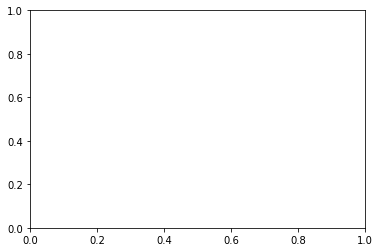

In [80]:
plt.bar(range(1,len(trans_clust_5.columns)),actual_error_scores_test,10)

In [72]:
 ################### Experiment  
i=1
cust_id = trans_clust_5.columns[i]
print ("customer number ",i)

train_x_cust,train_y_cust, scalar_train = prepare_training_data(train_x.iloc[:,i], 3)
test_x_cust,test_y_cust,scalar_test = prepare_training_data(test_x.iloc[:,i], 3)  
model.fit(train_x_cust, train_y_cust, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)
    # input size should be divisible by batch size for stateful LSTM
trainScore = model.evaluate(train_x_cust, train_y_cust, batch_size=1, verbose=2)
    #print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(test_x_cust, test_y_cust, batch_size=1, verbose=2)
    #print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    #print('unscaled test score %f MSE' %(scaler.inverse_transform(testScore)))
train_rmse.append(trainScore)
test_rmse.append(testScore)
    # generate predictions for training
trainPredict = model.predict(train_x_cust,batch_size=1)
testPredict = model.predict(test_x_cust,batch_size=1)
yhat_act_test = scalar_test.inverse_transform(testPredict)
    # report performance
rmse_test = sqrt(mean_squared_error(test_x.iloc[-(len(yhat_act_test)):,i], yhat_act_test))
print(cust_id," Test RMSE: ",rmse_test)
actual_error_scores_test.append(rmse_test)
yhat_act_train = scalar_train.inverse_transform(trainScore)
rmse_train = sqrt(mean_squared_error(train_x.iloc[-(len(yhat_act_train)):,i],yhat_act_train))
actual_train_rmse.append(rmse_train)
    # write predictions into csv
result_prediction = pd.DataFrame()#, original_fv : test_y_cust, prediction_fv :testPredict})
    #result_prediction['dates'] = test_x['dates']
result_prediction['original_fv_scaled'] = test_y_cust
result_prediction['prediction_scaled'] = testPredict
result_prediction['prediction_actual'] = yhat_act_test
result_prediction['fv_actual'] = test_x.iloc[-(len(yhat_act_test)):,i]
result_prediction.to_csv("predictions_clusters/prediction_clust_5_347customers/predictions_for_client_"+str(cust_id)+".csv")
model.reset_states()

customer number  1


/Users/anusha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
 - 9s - loss: 0.1493
Epoch 2/10
 - 9s - loss: 0.1482
Epoch 3/10
 - 9s - loss: 0.1437
Epoch 4/10
 - 9s - loss: 0.1321
Epoch 5/10
 - 10s - loss: 0.1191
Epoch 6/10
 - 9s - loss: 0.1170
Epoch 7/10
 - 10s - loss: 0.1084
Epoch 8/10
 - 9s - loss: 0.1148
Epoch 9/10
 - 9s - loss: 0.1141
Epoch 10/10
 - 9s - loss: 0.1079
1009141  Test RMSE:  0.5710009196775934


In [74]:
# Cluster 2 model
trans_clust_6 = clust_6.T
#print (trans_clust_5.head())
trans_clust_6.set_index(clust_dates,inplace=True)
trans_clust_6.columns = trans_clust_6.iloc[0]
trans_clust_6.columns = trans_clust_6.columns.get_level_values(0)
trans_clust_6=trans_clust_6.drop(trans_clust_6.index[0])
trans_clust_6 = trans_clust_6.reset_index()
# renaming column value
trans_clust_6.columns.values[[0]] = ['dates']
trans_clust_6


dates,dates,1020907,1029070,1029119,1040358,1051909,1064371,1069677,1069728,1071798,...,9782079,9783520,9857915,9911561,9970452,9985085,9986022,9995153,10034994,10058397
0,2014-01-01,21.17247,-1.3651108,-104.11878,0.0,0.0,0.0,0.0,-2016.4852,-485.61163,...,0,-7.03608,0,0,0,392.89,0,0,0,0
1,2014-01-02,21.81552,-2.2687392,-89.25063,0.0,0.0,0.0,0.0,-1883.9456,-463.14435,...,0,-40.4701,0,-1.84748,0,394.111,0,0,0,0
2,2014-01-03,22.458654,-2.2178807,-74.3805,0.0,0.0,0.0,0.0,-1751.3883,-440.67404,...,0,-37.7229,0,-1.78389,0,395.332,0,0,0,0
3,2014-01-04,23.101875,-2.1670153,-59.508377,0.0,0.0,0.0,0.0,-1618.8132,-418.20074,...,0,-34.9754,0,-1.7203,0,396.553,0,0,0,0
4,2014-01-05,23.745184,-2.116143,-44.634266,0.0,0.0,0.0,0.0,-1486.2205,-395.72443,...,0,-32.2274,0,-1.65669,0,397.774,0,0,0,0
5,2014-01-06,24.388577,-2.065264,-29.758165,0.0,0.0,0.0,0.0,-1353.61,-373.24512,...,0,-29.4791,0,-1.59308,0,398.996,0,0,0,0
6,2014-01-07,25.032055,-2.014378,-14.880077,0.0,0.0,0.0,0.0,-1220.9818,-350.76282,...,0,-26.7305,0,-1.52946,0,400.217,0,0,0,0
7,2014-01-08,25.675621,-1.9634854,0.0,0.0,0.0,0.0,0.0,-1088.3359,-328.2775,...,0,-23.9814,0,-1.46583,0,401.439,0,0,0,0
8,2014-01-09,26.319271,-1.912586,14.882067,0.0,0.0,0.0,0.0,-1188.482,-305.78915,...,0,-21.2321,0,-1.40219,0,402.661,0,0,0,0
9,2014-01-10,26.963009,-1.8616797,29.766123,0.0,0.0,0.0,0.0,-1047.7877,-283.29782,...,0,-18.4823,0,-1.33854,0,403.883,0,0,0,0


In [75]:
%%time
#split data into train and test
train_x = trans_clust_6[trans_clust_6['dates'].str.contains('2018-') == False]
test_x = trans_clust_6[(trans_clust_6['dates'].str.contains('2018-') == True) | (trans_clust_6['dates'].str.contains('2017-12') == True)]

# 3 lags for each data point as input to model
lag =  3

# model parameters
num_neurons = 24
batch_size = 1  # this forces the lstm to step through each time-step one at a time
batch_input_shape=(batch_size, 1, lag)

# instantiate a sequential model
model = Sequential()
model.add(Conv1D(filters=24,batch_size=1, kernel_size=3, strides=3, padding="same",activation='relu',dilation_rate=1, input_shape=(1, 3),data_format='channels_first'))
model.add(MaxPooling1D(pool_size=3,strides=3, padding="same"))
model.add(Dropout(0.2))
model.add(LSTM(units=num_neurons, 
              batch_input_shape=batch_input_shape, return_sequences=False,# as we only want last hidden output 
              stateful=True))
model.add(Dense(1))
# we can add dropoutlayer after dense as well again
model.add(Dropout(0.2))
# compile
model.compile(loss='mean_absolute_error', optimizer='adam')

# build model over clust 5 customers where each column is a customer fv_cost
train_rmse =[]
test_rmse = []
actual_train_rmse = []
actual_error_scores_test = list()
for i in range(1,len(trans_clust_6.columns)):
#    cust_data = trans_clust_5.iloc[i]
    cust_id = trans_clust_6.columns[i]
    print ("customer number ",i)
    
    train_x_cust,train_y_cust, scalar_train = prepare_training_data(train_x.iloc[:,i], 3)
    test_x_cust,test_y_cust,scalar_test = prepare_training_data(test_x.iloc[:,i], 3)  
    model.fit(train_x_cust, train_y_cust, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)
    # input size should be divisible by batch size for stateful LSTM
    trainScore = model.evaluate(train_x_cust, train_y_cust, batch_size=1, verbose=2)
    #print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
    testScore = model.evaluate(test_x_cust, test_y_cust, batch_size=1, verbose=2)
    #print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    #print('unscaled test score %f MSE' %(scaler.inverse_transform(testScore)))
    train_rmse.append(trainScore)
    test_rmse.append(testScore)
    # generate predictions for training
    trainPredict = model.predict(train_x_cust,batch_size=1)
    testPredict = model.predict(test_x_cust,batch_size=1)
    yhat_act_test = scalar_test.inverse_transform(testPredict)
    # report performance
    rmse_test = sqrt(mean_squared_error(test_x.iloc[-(len(yhat_act_test)):,i], yhat_act_test))
    print(cust_id," Test RMSE: ",rmse_test)
    actual_error_scores_test.append(rmse_test)
    yhat_act_train = scalar_train.inverse_transform(trainScore)
    rmse_train = sqrt(mean_squared_error(train_x.iloc[-(len(yhat_act_train)):,i],yhat_act_train))
    actual_train_rmse.append(rmse_train)
    # write predictions into csv
    result_prediction = pd.DataFrame()#, original_fv : test_y_cust, prediction_fv :testPredict})
    #result_prediction['dates'] = test_x['dates']
    result_prediction['original_fv_scaled'] = test_y_cust
    result_prediction['prediction_scaled'] = testPredict
    result_prediction['prediction_actual'] = yhat_act_test
    result_prediction['fv_actual'] = test_x.iloc[-(len(yhat_act_test)):,i]
    result_prediction.to_csv("predictions_clusters/prediction_clust_6_483customers/predictions_for_client_"+str(cust_id)+".csv")
    i=i+1
    model.reset_states()

customer number  1


/Users/anusha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
 - 11s - loss: 0.2337
Epoch 2/10
 - 10s - loss: 0.1998
Epoch 3/10
 - 10s - loss: 0.2250
Epoch 4/10
 - 10s - loss: 0.2201
Epoch 5/10
 - 10s - loss: 0.2252
Epoch 6/10
 - 9s - loss: 0.2050
Epoch 7/10
 - 9s - loss: 0.2195
Epoch 8/10
 - 9s - loss: 0.2086
Epoch 9/10
 - 9s - loss: 0.2094
Epoch 10/10
 - 9s - loss: 0.2240
1020907  Test RMSE:  0.09951654076576233
customer number  2
Epoch 1/10
 - 9s - loss: 0.1124
Epoch 2/10
 - 9s - loss: 0.1387
Epoch 3/10
 - 9s - loss: 0.1717
Epoch 4/10
 - 9s - loss: 0.1689
Epoch 5/10
 - 10s - loss: 0.1610
Epoch 6/10
 - 9s - loss: 0.1769
Epoch 7/10
 - 9s - loss: 0.1681
Epoch 8/10
 - 9s - loss: 0.1446
Epoch 9/10
 - 10s - loss: 0.1411
Epoch 10/10
 - 9s - loss: 0.1410
1029070  Test RMSE:  0.3081687207615378
customer number  3
Epoch 1/10
 - 9s - loss: 0.1035
Epoch 2/10
 - 9s - loss: 0.0980
Epoch 3/10
 - 9s - loss: 0.0945
Epoch 4/10
 - 10s - loss: 0.1035
Epoch 5/10
 - 9s - loss: 0.0988
Epoch 6/10
 - 9s - loss: 0.1065
Epoch 7/10
 - 9s - loss: 0.1017
Epoch 8

Epoch 7/10
 - 9s - loss: 0.1653
Epoch 8/10
 - 9s - loss: 0.1729
Epoch 9/10
 - 9s - loss: 0.1698
Epoch 10/10
 - 9s - loss: 0.1593
1141004  Test RMSE:  0.20065928841472339
customer number  23
Epoch 1/10
 - 9s - loss: 0.1262
Epoch 2/10
 - 9s - loss: 0.1282
Epoch 3/10
 - 9s - loss: 0.1263
Epoch 4/10
 - 9s - loss: 0.1373
Epoch 5/10
 - 9s - loss: 0.1340
Epoch 6/10
 - 9s - loss: 0.1291
Epoch 7/10
 - 9s - loss: 0.1297
Epoch 8/10
 - 9s - loss: 0.1373
Epoch 9/10
 - 9s - loss: 0.1180
Epoch 10/10
 - 9s - loss: 0.1327
1141325  Test RMSE:  2.2849695631439984
customer number  24
Epoch 1/10
 - 9s - loss: 0.1403
Epoch 2/10
 - 9s - loss: 0.1421
Epoch 3/10
 - 9s - loss: 0.1616
Epoch 4/10
 - 9s - loss: 0.1500
Epoch 5/10
 - 9s - loss: 0.1478
Epoch 6/10
 - 9s - loss: 0.1523
Epoch 7/10
 - 9s - loss: 0.1360
Epoch 8/10
 - 9s - loss: 0.1473
Epoch 9/10
 - 9s - loss: 0.1451
Epoch 10/10
 - 9s - loss: 0.1480
1158954  Test RMSE:  0.22822902120400856
customer number  25
Epoch 1/10
 - 9s - loss: 0.2058
Epoch 2/10
 - 9

 - 9s - loss: 0.1158
Epoch 2/10
 - 9s - loss: 0.1196
Epoch 3/10
 - 10s - loss: 0.1098
Epoch 4/10
 - 9s - loss: 0.1120
Epoch 5/10
 - 9s - loss: 0.1159
Epoch 6/10
 - 9s - loss: 0.1141
Epoch 7/10
 - 9s - loss: 0.1132
Epoch 8/10
 - 9s - loss: 0.1128
Epoch 9/10
 - 9s - loss: 0.1093
Epoch 10/10
 - 9s - loss: 0.1193
1347697  Test RMSE:  12.981567410515192
customer number  45
Epoch 1/10
 - 9s - loss: 0.1208
Epoch 2/10
 - 10s - loss: 0.1175
Epoch 3/10
 - 9s - loss: 0.1105
Epoch 4/10
 - 9s - loss: 0.1133
Epoch 5/10
 - 9s - loss: 0.1212
Epoch 6/10
 - 9s - loss: 0.1203
Epoch 7/10
 - 9s - loss: 0.1199
Epoch 8/10
 - 10s - loss: 0.1254
Epoch 9/10
 - 10s - loss: 0.1096
Epoch 10/10
 - 10s - loss: 0.1189
1361243  Test RMSE:  8.488556937492588
customer number  46
Epoch 1/10
 - 9s - loss: 0.2047
Epoch 2/10
 - 9s - loss: 0.2062
Epoch 3/10
 - 10s - loss: 0.1881
Epoch 4/10
 - 10s - loss: 0.2099
Epoch 5/10
 - 9s - loss: 0.2050
Epoch 6/10
 - 9s - loss: 0.2001
Epoch 7/10
 - 9s - loss: 0.1865
Epoch 8/10
 - 9s - 

Epoch 7/10
 - 9s - loss: 0.1300
Epoch 8/10
 - 9s - loss: 0.1310
Epoch 9/10
 - 10s - loss: 0.1308
Epoch 10/10
 - 9s - loss: 0.1259
1456793  Test RMSE:  0.2274360461482675
customer number  66
Epoch 1/10
 - 9s - loss: 0.1503
Epoch 2/10
 - 9s - loss: 0.1543
Epoch 3/10
 - 9s - loss: 0.1475
Epoch 4/10
 - 9s - loss: 0.1461
Epoch 5/10
 - 10s - loss: 0.1379
Epoch 6/10
 - 9s - loss: 0.1449
Epoch 7/10
 - 9s - loss: 0.1498
Epoch 8/10
 - 9s - loss: 0.1451
Epoch 9/10
 - 9s - loss: 0.1390
Epoch 10/10
 - 9s - loss: 0.1431
1462212  Test RMSE:  0.22527987278748568
customer number  67
Epoch 1/10
 - 9s - loss: 0.0427
Epoch 2/10
 - 9s - loss: 0.0426
Epoch 3/10
 - 10s - loss: 0.0431
Epoch 4/10
 - 10s - loss: 0.0431
Epoch 5/10
 - 9s - loss: 0.0396
Epoch 6/10
 - 9s - loss: 0.0397
Epoch 7/10
 - 10s - loss: 0.0440
Epoch 8/10
 - 10s - loss: 0.0456
Epoch 9/10
 - 10s - loss: 0.0403
Epoch 10/10
 - 10s - loss: 0.0449
1463965  Test RMSE:  0.24711762214559263
customer number  68
Epoch 1/10
 - 10s - loss: 0.1055
Epoch 

 - 9s - loss: 0.0865
Epoch 2/10
 - 9s - loss: 0.0960
Epoch 3/10
 - 9s - loss: 0.0880
Epoch 4/10
 - 9s - loss: 0.0886
Epoch 5/10
 - 9s - loss: 0.0868
Epoch 6/10
 - 9s - loss: 0.0894
Epoch 7/10
 - 9s - loss: 0.0882
Epoch 8/10
 - 9s - loss: 0.0956
Epoch 9/10
 - 9s - loss: 0.0905
Epoch 10/10
 - 9s - loss: 0.0909
1600536  Test RMSE:  0.24115756051298542
customer number  88
Epoch 1/10
 - 9s - loss: 0.1788
Epoch 2/10
 - 9s - loss: 0.1750
Epoch 3/10
 - 9s - loss: 0.1662
Epoch 4/10
 - 9s - loss: 0.1652
Epoch 5/10
 - 9s - loss: 0.1653
Epoch 6/10
 - 9s - loss: 0.1619
Epoch 7/10
 - 9s - loss: 0.1524
Epoch 8/10
 - 9s - loss: 0.1718
Epoch 9/10
 - 9s - loss: 0.1654
Epoch 10/10
 - 9s - loss: 0.1565
1600537  Test RMSE:  0.20917591966431892
customer number  89
Epoch 1/10
 - 9s - loss: 0.0677
Epoch 2/10
 - 9s - loss: 0.0755
Epoch 3/10
 - 9s - loss: 0.0714
Epoch 4/10
 - 9s - loss: 0.0747
Epoch 5/10
 - 9s - loss: 0.0713
Epoch 6/10
 - 9s - loss: 0.0739
Epoch 7/10
 - 9s - loss: 0.0681
Epoch 8/10
 - 9s - loss

Epoch 7/10
 - 9s - loss: 0.0210
Epoch 8/10
 - 8s - loss: 0.0191
Epoch 9/10
 - 9s - loss: 0.0233
Epoch 10/10
 - 9s - loss: 0.0182
1679300  Test RMSE:  0.25589813960012153
customer number  109
Epoch 1/10
 - 9s - loss: 0.1622
Epoch 2/10
 - 9s - loss: 0.1433
Epoch 3/10
 - 9s - loss: 0.1471
Epoch 4/10
 - 9s - loss: 0.1557
Epoch 5/10
 - 9s - loss: 0.1550
Epoch 6/10
 - 9s - loss: 0.1583
Epoch 7/10
 - 9s - loss: 0.1527
Epoch 8/10
 - 9s - loss: 0.1608
Epoch 9/10
 - 9s - loss: 0.1643
Epoch 10/10
 - 9s - loss: 0.1670
1679537  Test RMSE:  4.784657861113748
customer number  110
Epoch 1/10
 - 9s - loss: 0.0859
Epoch 2/10
 - 8s - loss: 0.1039
Epoch 3/10
 - 9s - loss: 0.0953
Epoch 4/10
 - 8s - loss: 0.0925
Epoch 5/10
 - 9s - loss: 0.0975
Epoch 6/10
 - 9s - loss: 0.0866
Epoch 7/10
 - 9s - loss: 0.0905
Epoch 8/10
 - 9s - loss: 0.0973
Epoch 9/10
 - 9s - loss: 0.0930
Epoch 10/10
 - 9s - loss: 0.0959
1682398  Test RMSE:  0.5175504546895647
customer number  111
Epoch 1/10
 - 9s - loss: 0.0304
Epoch 2/10
 - 

 - 9s - loss: 0.1202
Epoch 2/10
 - 9s - loss: 0.1163
Epoch 3/10
 - 9s - loss: 0.1166
Epoch 4/10
 - 9s - loss: 0.1064
Epoch 5/10
 - 8s - loss: 0.1109
Epoch 6/10
 - 8s - loss: 0.1165
Epoch 7/10
 - 9s - loss: 0.1093
Epoch 8/10
 - 9s - loss: 0.1063
Epoch 9/10
 - 8s - loss: 0.1162
Epoch 10/10
 - 9s - loss: 0.0998
1813218  Test RMSE:  245.33050705009398
customer number  131
Epoch 1/10
 - 9s - loss: 0.0707
Epoch 2/10
 - 8s - loss: 0.0664
Epoch 3/10
 - 9s - loss: 0.0615
Epoch 4/10
 - 9s - loss: 0.0693
Epoch 5/10
 - 9s - loss: 0.0588
Epoch 6/10
 - 9s - loss: 0.0681
Epoch 7/10
 - 9s - loss: 0.0662
Epoch 8/10
 - 9s - loss: 0.0638
Epoch 9/10
 - 9s - loss: 0.0707
Epoch 10/10
 - 9s - loss: 0.0585
1867816  Test RMSE:  2.8875032563657497
customer number  132
Epoch 1/10
 - 9s - loss: 0.1473
Epoch 2/10
 - 9s - loss: 0.1390
Epoch 3/10
 - 9s - loss: 0.1517
Epoch 4/10
 - 9s - loss: 0.1502
Epoch 5/10
 - 9s - loss: 0.1511
Epoch 6/10
 - 9s - loss: 0.1555
Epoch 7/10
 - 9s - loss: 0.1394
Epoch 8/10
 - 9s - loss

 - 9s - loss: 0.0617
Epoch 7/10
 - 9s - loss: 0.0567
Epoch 8/10
 - 9s - loss: 0.0591
Epoch 9/10
 - 9s - loss: 0.0544
Epoch 10/10
 - 9s - loss: 0.0540
2068271  Test RMSE:  0.1431198620525992
customer number  152
Epoch 1/10
 - 9s - loss: 0.0994
Epoch 2/10
 - 9s - loss: 0.0965
Epoch 3/10
 - 9s - loss: 0.0965
Epoch 4/10
 - 9s - loss: 0.0964
Epoch 5/10
 - 9s - loss: 0.0897
Epoch 6/10
 - 9s - loss: 0.1013
Epoch 7/10
 - 9s - loss: 0.0877
Epoch 8/10
 - 9s - loss: 0.1004
Epoch 9/10
 - 9s - loss: 0.0979
Epoch 10/10
 - 9s - loss: 0.0954
3011305  Test RMSE:  0.2021754442879542
customer number  153
Epoch 1/10
 - 9s - loss: 0.1227
Epoch 2/10
 - 9s - loss: 0.1233
Epoch 3/10
 - 9s - loss: 0.1185
Epoch 4/10
 - 9s - loss: 0.1171
Epoch 5/10
 - 9s - loss: 0.1197
Epoch 6/10
 - 9s - loss: 0.1256
Epoch 7/10
 - 9s - loss: 0.1301
Epoch 8/10
 - 9s - loss: 0.1164
Epoch 9/10
 - 9s - loss: 0.1281
Epoch 10/10
 - 9s - loss: 0.1300
3088871  Test RMSE:  0.8504102002457763
customer number  154
Epoch 1/10
 - 9s - loss: 

Epoch 10/10
 - 9s - loss: 0.0851
3608425  Test RMSE:  0.22341067832092712
customer number  173
Epoch 1/10
 - 9s - loss: 0.1278
Epoch 2/10
 - 9s - loss: 0.1450
Epoch 3/10
 - 9s - loss: 0.1361
Epoch 4/10
 - 9s - loss: 0.1439
Epoch 5/10
 - 9s - loss: 0.1549
Epoch 6/10
 - 9s - loss: 0.1525
Epoch 7/10
 - 9s - loss: 0.1473
Epoch 8/10
 - 9s - loss: 0.1365
Epoch 9/10
 - 9s - loss: 0.1401
Epoch 10/10
 - 9s - loss: 0.1383
4528948  Test RMSE:  0.2045367956161499
customer number  174
Epoch 1/10
 - 10s - loss: 0.1378
Epoch 2/10
 - 9s - loss: 0.1747
Epoch 3/10
 - 10s - loss: 0.1688
Epoch 4/10
 - 10s - loss: 0.1637
Epoch 5/10
 - 9s - loss: 0.1575
Epoch 6/10
 - 9s - loss: 0.1769
Epoch 7/10
 - 9s - loss: 0.1675
Epoch 8/10
 - 9s - loss: 0.1695
Epoch 9/10
 - 9s - loss: 0.1555
Epoch 10/10
 - 9s - loss: 0.1703
4602927  Test RMSE:  0.20441389289395592
customer number  175
Epoch 1/10
 - 9s - loss: 0.1415
Epoch 2/10
 - 9s - loss: 0.1556
Epoch 3/10
 - 9s - loss: 0.1570
Epoch 4/10
 - 9s - loss: 0.1480
Epoch 5/1

 - 9s - loss: 0.1422
Epoch 3/10
 - 9s - loss: 0.1459
Epoch 4/10
 - 9s - loss: 0.1392
Epoch 5/10
 - 9s - loss: 0.1479
Epoch 6/10
 - 9s - loss: 0.1567
Epoch 7/10
 - 9s - loss: 0.1492
Epoch 8/10
 - 9s - loss: 0.1461
Epoch 9/10
 - 10s - loss: 0.1478
Epoch 10/10
 - 10s - loss: 0.1521
5723817  Test RMSE:  0.19705304503440857
customer number  195
Epoch 1/10
 - 9s - loss: 0.1317
Epoch 2/10
 - 9s - loss: 0.1233
Epoch 3/10
 - 9s - loss: 0.1248
Epoch 4/10
 - 9s - loss: 0.1153
Epoch 5/10
 - 9s - loss: 0.1175
Epoch 6/10
 - 9s - loss: 0.1265
Epoch 7/10
 - 9s - loss: 0.1283
Epoch 8/10
 - 9s - loss: 0.1210
Epoch 9/10
 - 9s - loss: 0.1310
Epoch 10/10
 - 9s - loss: 0.1171
5727677  Test RMSE:  8.803563234026967
customer number  196
Epoch 1/10
 - 9s - loss: 0.1962
Epoch 2/10
 - 10s - loss: 0.1837
Epoch 3/10
 - 9s - loss: 0.1951
Epoch 4/10
 - 10s - loss: 0.2048
Epoch 5/10
 - 9s - loss: 0.2182
Epoch 6/10
 - 9s - loss: 0.2008
Epoch 7/10
 - 9s - loss: 0.2190
Epoch 8/10
 - 9s - loss: 0.2220
Epoch 9/10
 - 9s - 

Epoch 7/10
 - 9s - loss: 0.1375
Epoch 8/10
 - 9s - loss: 0.1282
Epoch 9/10
 - 9s - loss: 0.1428
Epoch 10/10
 - 9s - loss: 0.1486
6771734  Test RMSE:  0.2192692756652832
customer number  216
Epoch 1/10
 - 9s - loss: 0.1091
Epoch 2/10
 - 9s - loss: 0.1073
Epoch 3/10
 - 9s - loss: 0.1022
Epoch 4/10
 - 9s - loss: 0.1102
Epoch 5/10
 - 9s - loss: 0.0939
Epoch 6/10
 - 9s - loss: 0.1212
Epoch 7/10
 - 9s - loss: 0.1030
Epoch 8/10
 - 9s - loss: 0.1000
Epoch 9/10
 - 9s - loss: 0.1090
Epoch 10/10
 - 9s - loss: 0.1060
6771807  Test RMSE:  0.1341972863965863
customer number  217
Epoch 1/10
 - 9s - loss: 0.0939
Epoch 2/10
 - 9s - loss: 0.0926
Epoch 3/10
 - 9s - loss: 0.0978
Epoch 4/10
 - 9s - loss: 0.0966
Epoch 5/10
 - 9s - loss: 0.0870
Epoch 6/10
 - 9s - loss: 0.0932
Epoch 7/10
 - 9s - loss: 0.0921
Epoch 8/10
 - 9s - loss: 0.0913
Epoch 9/10
 - 9s - loss: 0.0996
Epoch 10/10
 - 9s - loss: 0.0886
6773621  Test RMSE:  0.10450768048939466
customer number  218
Epoch 1/10
 - 9s - loss: 0.1618
Epoch 2/10
 -

 - 9s - loss: 0.1202
Epoch 2/10
 - 9s - loss: 0.1216
Epoch 3/10
 - 9s - loss: 0.1297
Epoch 4/10
 - 9s - loss: 0.1273
Epoch 5/10
 - 9s - loss: 0.1260
Epoch 6/10
 - 9s - loss: 0.1285
Epoch 7/10
 - 9s - loss: 0.1246
Epoch 8/10
 - 9s - loss: 0.1299
Epoch 9/10
 - 9s - loss: 0.1208
Epoch 10/10
 - 9s - loss: 0.1256
7338015  Test RMSE:  1.543141273476098
customer number  238
Epoch 1/10
 - 9s - loss: 0.0665
Epoch 2/10
 - 9s - loss: 0.0675
Epoch 3/10
 - 9s - loss: 0.0630
Epoch 4/10
 - 9s - loss: 0.0707
Epoch 5/10
 - 9s - loss: 0.0671
Epoch 6/10
 - 9s - loss: 0.0641
Epoch 7/10
 - 9s - loss: 0.0624
Epoch 8/10
 - 9s - loss: 0.0633
Epoch 9/10
 - 9s - loss: 0.0648
Epoch 10/10
 - 9s - loss: 0.0652
7364148  Test RMSE:  0.23979157005530372
customer number  239
Epoch 1/10
 - 9s - loss: 0.1284
Epoch 2/10
 - 9s - loss: 0.1337
Epoch 3/10
 - 9s - loss: 0.1343
Epoch 4/10
 - 9s - loss: 0.1363
Epoch 5/10
 - 9s - loss: 0.1358
Epoch 6/10
 - 9s - loss: 0.1188
Epoch 7/10
 - 9s - loss: 0.1201
Epoch 8/10
 - 9s - loss

Epoch 7/10
 - 9s - loss: 0.1097
Epoch 8/10
 - 9s - loss: 0.1150
Epoch 9/10
 - 9s - loss: 0.1131
Epoch 10/10
 - 9s - loss: 0.1069
7542542  Test RMSE:  2.1473442780942342
customer number  259
Epoch 1/10
 - 9s - loss: 0.0773
Epoch 2/10
 - 9s - loss: 0.0786
Epoch 3/10
 - 9s - loss: 0.0852
Epoch 4/10
 - 9s - loss: 0.0854
Epoch 5/10
 - 9s - loss: 0.0876
Epoch 6/10
 - 9s - loss: 0.0757
Epoch 7/10
 - 9s - loss: 0.0801
Epoch 8/10
 - 9s - loss: 0.0854
Epoch 9/10
 - 9s - loss: 0.0804
Epoch 10/10
 - 9s - loss: 0.0779
7543158  Test RMSE:  2.547054733025174
customer number  260
Epoch 1/10
 - 9s - loss: 0.1290
Epoch 2/10
 - 9s - loss: 0.1565
Epoch 3/10
 - 9s - loss: 0.1382
Epoch 4/10
 - 9s - loss: 0.1638
Epoch 5/10
 - 9s - loss: 0.1463
Epoch 6/10
 - 9s - loss: 0.1437
Epoch 7/10
 - 9s - loss: 0.1399
Epoch 8/10
 - 9s - loss: 0.1418
Epoch 9/10
 - 9s - loss: 0.1493
Epoch 10/10
 - 9s - loss: 0.1546
7552505  Test RMSE:  2.6523741660128235
customer number  261
Epoch 1/10
 - 9s - loss: 0.1424
Epoch 2/10
 - 9

7693184  Test RMSE:  0.2326587438583374
customer number  280
Epoch 1/10
 - 9s - loss: 0.0744
Epoch 2/10
 - 9s - loss: 0.0787
Epoch 3/10
 - 9s - loss: 0.0917
Epoch 4/10
 - 9s - loss: 0.0820
Epoch 5/10
 - 9s - loss: 0.0850
Epoch 6/10
 - 9s - loss: 0.0836
Epoch 7/10
 - 9s - loss: 0.0796
Epoch 8/10
 - 9s - loss: 0.0833
Epoch 9/10
 - 9s - loss: 0.0858
Epoch 10/10
 - 9s - loss: 0.0903
7694199  Test RMSE:  0.9856563084552513
customer number  281
Epoch 1/10
 - 9s - loss: 0.1415
Epoch 2/10
 - 9s - loss: 0.1503
Epoch 3/10
 - 9s - loss: 0.1435
Epoch 4/10
 - 9s - loss: 0.1627
Epoch 5/10
 - 9s - loss: 0.1395
Epoch 6/10
 - 9s - loss: 0.1351
Epoch 7/10
 - 9s - loss: 0.1482
Epoch 8/10
 - 9s - loss: 0.1450
Epoch 9/10
 - 9s - loss: 0.1486
Epoch 10/10
 - 9s - loss: 0.1373
7722028  Test RMSE:  0.23640919348289452
customer number  282
Epoch 1/10
 - 9s - loss: 0.0528
Epoch 2/10
 - 9s - loss: 0.0574
Epoch 3/10
 - 9s - loss: 0.0589
Epoch 4/10
 - 9s - loss: 0.0519
Epoch 5/10
 - 9s - loss: 0.0547
Epoch 6/10
 - 

 - 8s - loss: 0.1560
Epoch 5/10
 - 8s - loss: 0.1544
Epoch 6/10
 - 8s - loss: 0.1498
Epoch 7/10
 - 8s - loss: 0.1506
Epoch 8/10
 - 8s - loss: 0.1686
Epoch 9/10
 - 8s - loss: 0.1435
Epoch 10/10
 - 8s - loss: 0.1447
7913656  Test RMSE:  0.7040934494214967
customer number  302
Epoch 1/10
 - 8s - loss: 0.1597
Epoch 2/10
 - 8s - loss: 0.1604
Epoch 3/10
 - 8s - loss: 0.2004
Epoch 4/10
 - 8s - loss: 0.1673
Epoch 5/10
 - 8s - loss: 0.1695
Epoch 6/10
 - 8s - loss: 0.1544
Epoch 7/10
 - 8s - loss: 0.1747
Epoch 8/10
 - 8s - loss: 0.1751
Epoch 9/10
 - 8s - loss: 0.1749
Epoch 10/10
 - 8s - loss: 0.1722
7924089  Test RMSE:  0.22879260778427124
customer number  303
Epoch 1/10
 - 8s - loss: 0.0875
Epoch 2/10
 - 8s - loss: 0.0833
Epoch 3/10
 - 8s - loss: 0.0798
Epoch 4/10
 - 8s - loss: 0.0875
Epoch 5/10
 - 8s - loss: 0.0818
Epoch 6/10
 - 8s - loss: 0.0959
Epoch 7/10
 - 8s - loss: 0.0873
Epoch 8/10
 - 9s - loss: 0.0835
Epoch 9/10
 - 9s - loss: 0.0882
Epoch 10/10
 - 9s - loss: 0.0921
7925425  Test RMSE:  

Epoch 9/10
 - 9s - loss: 0.1353
Epoch 10/10
 - 9s - loss: 0.1320
7979045  Test RMSE:  2.34166463863626
customer number  323
Epoch 1/10
 - 9s - loss: 0.1561
Epoch 2/10
 - 9s - loss: 0.1630
Epoch 3/10
 - 9s - loss: 0.1509
Epoch 4/10
 - 9s - loss: 0.1651
Epoch 5/10
 - 10s - loss: 0.1556
Epoch 6/10
 - 11s - loss: 0.1387
Epoch 7/10
 - 11s - loss: 0.1553
Epoch 8/10
 - 10s - loss: 0.1326
Epoch 9/10
 - 10s - loss: 0.1335
Epoch 10/10
 - 10s - loss: 0.1530
7984227  Test RMSE:  1.3877936166727243
customer number  324
Epoch 1/10
 - 10s - loss: 0.0987
Epoch 2/10
 - 10s - loss: 0.1067
Epoch 3/10
 - 9s - loss: 0.1024
Epoch 4/10
 - 9s - loss: 0.1022
Epoch 5/10
 - 8s - loss: 0.1005
Epoch 6/10
 - 9s - loss: 0.1099
Epoch 7/10
 - 9s - loss: 0.1039
Epoch 8/10
 - 9s - loss: 0.1139
Epoch 9/10
 - 8s - loss: 0.1049
Epoch 10/10
 - 9s - loss: 0.1072
7984472  Test RMSE:  9.065330739405685
customer number  325
Epoch 1/10
 - 9s - loss: 0.1039
Epoch 2/10
 - 9s - loss: 0.0989
Epoch 3/10
 - 9s - loss: 0.1115
Epoch 4/1

 - 9s - loss: 0.1076
Epoch 2/10
 - 9s - loss: 0.1095
Epoch 3/10
 - 9s - loss: 0.1089
Epoch 4/10
 - 9s - loss: 0.1104
Epoch 5/10
 - 9s - loss: 0.1144
Epoch 6/10
 - 9s - loss: 0.1030
Epoch 7/10
 - 9s - loss: 0.1237
Epoch 8/10
 - 9s - loss: 0.1125
Epoch 9/10
 - 9s - loss: 0.1124
Epoch 10/10
 - 8s - loss: 0.1083
8073619  Test RMSE:  37.466573166649646
customer number  345
Epoch 1/10
 - 9s - loss: 0.1902
Epoch 2/10
 - 9s - loss: 0.1839
Epoch 3/10
 - 9s - loss: 0.1885
Epoch 4/10
 - 8s - loss: 0.1704
Epoch 5/10
 - 8s - loss: 0.1777
Epoch 6/10
 - 8s - loss: 0.1825
Epoch 7/10
 - 8s - loss: 0.1857
Epoch 8/10
 - 9s - loss: 0.1754
Epoch 9/10
 - 8s - loss: 0.1846
Epoch 10/10
 - 8s - loss: 0.1746
8076227  Test RMSE:  0.2420513927936554
customer number  346
Epoch 1/10
 - 9s - loss: 0.0372
Epoch 2/10
 - 9s - loss: 0.0434
Epoch 3/10
 - 9s - loss: 0.0365
Epoch 4/10
 - 9s - loss: 0.0414
Epoch 5/10
 - 9s - loss: 0.0394
Epoch 6/10
 - 8s - loss: 0.0390
Epoch 7/10
 - 8s - loss: 0.0377
Epoch 8/10
 - 8s - loss

Epoch 5/10
 - 9s - loss: 0.1077
Epoch 6/10
 - 9s - loss: 0.1127
Epoch 7/10
 - 9s - loss: 0.1213
Epoch 8/10
 - 10s - loss: 0.1140
Epoch 9/10
 - 9s - loss: 0.1245
Epoch 10/10
 - 9s - loss: 0.1161
8134588  Test RMSE:  0.25973997958804734
customer number  366
Epoch 1/10
 - 10s - loss: 0.1137
Epoch 2/10
 - 11s - loss: 0.1100
Epoch 3/10
 - 10s - loss: 0.1074
Epoch 4/10
 - 10s - loss: 0.1044
Epoch 5/10
 - 10s - loss: 0.1086
Epoch 6/10
 - 10s - loss: 0.1058
Epoch 7/10
 - 10s - loss: 0.1123
Epoch 8/10
 - 10s - loss: 0.1105
Epoch 9/10
 - 10s - loss: 0.1159
Epoch 10/10
 - 10s - loss: 0.1224
8152519  Test RMSE:  0.2632892059945658
customer number  367
Epoch 1/10
 - 10s - loss: 0.1979
Epoch 2/10
 - 10s - loss: 0.1833
Epoch 3/10
 - 9s - loss: 0.1905
Epoch 4/10
 - 9s - loss: 0.1949
Epoch 5/10
 - 9s - loss: 0.1892
Epoch 6/10
 - 9s - loss: 0.1864
Epoch 7/10
 - 9s - loss: 0.1986
Epoch 8/10
 - 9s - loss: 0.1793
Epoch 9/10
 - 9s - loss: 0.1947
Epoch 10/10
 - 9s - loss: 0.2067
8153760  Test RMSE:  0.239757

Epoch 8/10
 - 10s - loss: 0.0596
Epoch 9/10
 - 9s - loss: 0.0607
Epoch 10/10
 - 9s - loss: 0.0618
8266530  Test RMSE:  520.1039203392976
customer number  387
Epoch 1/10
 - 9s - loss: 0.1208
Epoch 2/10
 - 9s - loss: 0.1254
Epoch 3/10
 - 10s - loss: 0.1303
Epoch 4/10
 - 10s - loss: 0.1277
Epoch 5/10
 - 9s - loss: 0.1217
Epoch 6/10
 - 10s - loss: 0.1188
Epoch 7/10
 - 11s - loss: 0.1337
Epoch 8/10
 - 11s - loss: 0.1322
Epoch 9/10
 - 11s - loss: 0.1209
Epoch 10/10
 - 11s - loss: 0.1178
8269890  Test RMSE:  0.2619559497681188
customer number  388
Epoch 1/10
 - 11s - loss: 0.1695
Epoch 2/10
 - 11s - loss: 0.1557
Epoch 3/10
 - 11s - loss: 0.1519
Epoch 4/10
 - 11s - loss: 0.1680
Epoch 5/10
 - 10s - loss: 0.1585
Epoch 6/10
 - 10s - loss: 0.1517
Epoch 7/10
 - 10s - loss: 0.1717
Epoch 8/10
 - 9s - loss: 0.1587
Epoch 9/10
 - 9s - loss: 0.1756
Epoch 10/10
 - 9s - loss: 0.1680
8275483  Test RMSE:  217.6601436970027
customer number  389
Epoch 1/10
 - 9s - loss: 0.1115
Epoch 2/10
 - 9s - loss: 0.1103
E

 - 10s - loss: 0.0427
Epoch 10/10
 - 10s - loss: 0.0506
8393427  Test RMSE:  22.91658437743219
customer number  408
Epoch 1/10
 - 10s - loss: 0.0785
Epoch 2/10
 - 10s - loss: 0.0779
Epoch 3/10
 - 9s - loss: 0.0797
Epoch 4/10
 - 10s - loss: 0.0764
Epoch 5/10
 - 9s - loss: 0.0773
Epoch 6/10
 - 10s - loss: 0.0771
Epoch 7/10
 - 10s - loss: 0.0750
Epoch 8/10
 - 9s - loss: 0.0804
Epoch 9/10
 - 9s - loss: 0.0741
Epoch 10/10
 - 9s - loss: 0.0759
8395411  Test RMSE:  637.3541899872861
customer number  409
Epoch 1/10
 - 9s - loss: 0.1823
Epoch 2/10
 - 9s - loss: 0.1874
Epoch 3/10
 - 9s - loss: 0.1904
Epoch 4/10
 - 9s - loss: 0.1709
Epoch 5/10
 - 9s - loss: 0.1836
Epoch 6/10
 - 9s - loss: 0.1899
Epoch 7/10
 - 9s - loss: 0.1796
Epoch 8/10
 - 9s - loss: 0.1742
Epoch 9/10
 - 9s - loss: 0.1856
Epoch 10/10
 - 9s - loss: 0.1730
8395977  Test RMSE:  0.2418472571619687
customer number  410
Epoch 1/10
 - 9s - loss: 0.0159
Epoch 2/10
 - 9s - loss: 0.0116
Epoch 3/10
 - 9s - loss: 0.0145
Epoch 4/10
 - 9s - l

Epoch 3/10
 - 9s - loss: 0.1447
Epoch 4/10
 - 9s - loss: 0.1337
Epoch 5/10
 - 9s - loss: 0.1545
Epoch 6/10
 - 9s - loss: 0.1486
Epoch 7/10
 - 9s - loss: 0.1444
Epoch 8/10
 - 9s - loss: 0.1440
Epoch 9/10
 - 9s - loss: 0.1405
Epoch 10/10
 - 9s - loss: 0.1621
8534632  Test RMSE:  0.24735207393252215
customer number  430
Epoch 1/10
 - 9s - loss: 0.0685
Epoch 2/10
 - 9s - loss: 0.0668
Epoch 3/10
 - 9s - loss: 0.0672
Epoch 4/10
 - 9s - loss: 0.0672
Epoch 5/10
 - 9s - loss: 0.0671
Epoch 6/10
 - 9s - loss: 0.0686
Epoch 7/10
 - 9s - loss: 0.0709
Epoch 8/10
 - 9s - loss: 0.0605
Epoch 9/10
 - 9s - loss: 0.0640
Epoch 10/10
 - 9s - loss: 0.0615
8536163  Test RMSE:  0.2642123020935009
customer number  431
Epoch 1/10
 - 9s - loss: 0.1823
Epoch 2/10
 - 9s - loss: 0.1647
Epoch 3/10
 - 8s - loss: 0.1655
Epoch 4/10
 - 9s - loss: 0.1722
Epoch 5/10
 - 9s - loss: 0.1656
Epoch 6/10
 - 9s - loss: 0.1764
Epoch 7/10
 - 9s - loss: 0.1782
Epoch 8/10
 - 9s - loss: 0.1822
Epoch 9/10
 - 9s - loss: 0.1652
Epoch 10/10

Epoch 8/10
 - 9s - loss: 0.1833
Epoch 9/10
 - 9s - loss: 0.1848
Epoch 10/10
 - 9s - loss: 0.1982
9057226  Test RMSE:  0.24264947607600065
customer number  451
Epoch 1/10
 - 9s - loss: 0.0316
Epoch 2/10
 - 9s - loss: 0.0322
Epoch 3/10
 - 9s - loss: 0.0353
Epoch 4/10
 - 9s - loss: 0.0323
Epoch 5/10
 - 9s - loss: 0.0332
Epoch 6/10
 - 9s - loss: 0.0341
Epoch 7/10
 - 9s - loss: 0.0307
Epoch 8/10
 - 9s - loss: 0.0344
Epoch 9/10
 - 8s - loss: 0.0345
Epoch 10/10
 - 9s - loss: 0.0328
9061606  Test RMSE:  0.2650141006913859
customer number  452
Epoch 1/10
 - 9s - loss: 0.0453
Epoch 2/10
 - 9s - loss: 0.0412
Epoch 3/10
 - 9s - loss: 0.0476
Epoch 4/10
 - 9s - loss: 0.0443
Epoch 5/10
 - 9s - loss: 0.0470
Epoch 6/10
 - 9s - loss: 0.0458
Epoch 7/10
 - 9s - loss: 0.0446
Epoch 8/10
 - 9s - loss: 0.0456
Epoch 9/10
 - 9s - loss: 0.0474
Epoch 10/10
 - 9s - loss: 0.0464
9142339  Test RMSE:  0.19175992961458438
customer number  453
Epoch 1/10
 - 9s - loss: 0.1314
Epoch 2/10
 - 9s - loss: 0.1186
Epoch 3/10
 

 - 9s - loss: 0.0542
Epoch 2/10
 - 9s - loss: 0.0522
Epoch 3/10
 - 9s - loss: 0.0490
Epoch 4/10
 - 8s - loss: 0.0477
Epoch 5/10
 - 9s - loss: 0.0527
Epoch 6/10
 - 9s - loss: 0.0520
Epoch 7/10
 - 9s - loss: 0.0507
Epoch 8/10
 - 9s - loss: 0.0545
Epoch 9/10
 - 9s - loss: 0.0540
Epoch 10/10
 - 9s - loss: 0.0493
9737367  Test RMSE:  0.2810190566655166
customer number  473
Epoch 1/10
 - 9s - loss: 0.0863
Epoch 2/10
 - 9s - loss: 0.0992
Epoch 3/10
 - 9s - loss: 0.0872
Epoch 4/10
 - 9s - loss: 0.0836
Epoch 5/10
 - 9s - loss: 0.0912
Epoch 6/10
 - 9s - loss: 0.0871
Epoch 7/10
 - 9s - loss: 0.0898
Epoch 8/10
 - 9s - loss: 0.0881
Epoch 9/10
 - 9s - loss: 0.0939
Epoch 10/10
 - 9s - loss: 0.0833
9762221  Test RMSE:  3.7909191702555276
customer number  474
Epoch 1/10
 - 9s - loss: 0.1573
Epoch 2/10
 - 9s - loss: 0.1493
Epoch 3/10
 - 9s - loss: 0.1442
Epoch 4/10
 - 9s - loss: 0.1507
Epoch 5/10
 - 9s - loss: 0.1480
Epoch 6/10
 - 9s - loss: 0.1515
Epoch 7/10
 - 9s - loss: 0.1403
Epoch 8/10
 - 9s - loss

<Container object of 483 artists>

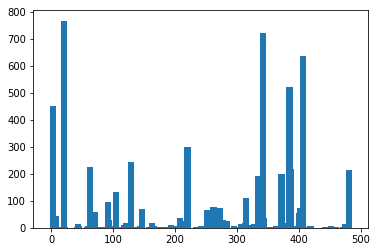

In [77]:
plt.bar(range(483),actual_error_scores_test,10)

In [82]:
# connecting 2 dataframes cust_id and dates data
cust_1000 = pd.read_csv("data-1000customers.csv")
cust_1000 = cust_1000[['client_debtor_number','dates','fv_cost']]
cust_1000 = cust_1000[cust_1000.fv_cost.notnull()]

/Users/anusha/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [91]:
print (df.columns)

Index(['customer_num', 'fv_cost', 'fv_cost.1', 'fv_cost.2', 'fv_cost.3',
       'fv_cost.4', 'fv_cost.5', 'fv_cost.6', 'fv_cost.7', 'fv_cost.8',
       ...
       'fv_cost.1453', 'fv_cost.1454', 'fv_cost.1455', 'fv_cost.1456',
       'fv_cost.1457', 'fv_cost.1458', 'fv_cost.1459', 'fv_cost.1460',
       'fv_cost.1461', 'cluster_lables'],
      dtype='object', length=1464)


In [116]:
#create new dataframe with 2 columns
df.rename(columns={'Unnamed: 0':'customer_num'},inplace=True)
cust_cluster_num = pd.DataFrame()
cust_cluster_num['client_debtor_number'] = df['customer_num']
cust_cluster_num['cluster_lables'] = df['cluster_lables']
cust_cluster_num = cust_cluster_num.iloc[2:]
print ("number of customers ",len(cust_cluster_num.client_debtor_number.unique()))
print ("length of cust-1000 dataframe ",len(cust_1000.client_debtor_number.unique()))
print ("clust dist ",cust_cluster_num.cluster_lables.describe())
cust_cluster_num.head()

number of customers  847
length of cust-1000 dataframe  1000
clust dist  count    847.000000
mean       5.540732
std        0.647184
min        1.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: cluster_lables, dtype: float64


,client_debtor_number,cluster_lables
2,1009141,5.0
3,1010055,5.0
4,1018494,5.0
5,1020907,6.0
6,1029070,6.0


In [105]:
#df = pd.merge(df1, df2, on=['document_id','item_id'])
#different column names
merged_cust = pd.merge(cust_cluster_num, cust_1000,on=['client_debtor_number'])
print (len(merged_cust))
print (merged_cust.head())

# After merging data since the number of customers reduced from 1000 to 847 in clusters dataset 
# we can see decrease in number of records

290799
  client_debtor_number  cluster_lables       dates  fv_cost
0              7727216             6.0  19/01/2010      0.0
1              7727216             6.0  20/01/2010      0.0
2              7727216             6.0  21/01/2010      0.0
3              7727216             6.0  22/01/2010      0.0
4              7727216             6.0  23/01/2010      0.0


In [122]:
#checking number of customers different to both datasets
data_clust = cust_cluster_num['client_debtor_number'].unique()
data_cust = cust_1000['client_debtor_number'].unique()

print ("number of different customers",len(set(data_clust).difference(set(data_cust))))
# only 347 number of customers match between 2 datasets and 510 are different,adding them
# give 847 customers which are number of customers in 8 clusters dataset

510

In [115]:
for i in range(1,8):
    #cust_clust_i = cust_cluster_num[cust_cluster_num.cluster_lables == i]
    #clust_i = merged_cust[merged_cust.client_debtor_number == cust_cluster_num.client_debtor_number]
    clust_i = merged_cust[merged_cust.cluster_lables == i]
    print (len(clust_i['client_debtor_number'].unique()))
    

0
0
2
0
131
202
2


In [131]:
# sort the dates in ascending
merged_cust['dates'] = pd.to_datetime(merged_cust['dates'],format= '%d/%m/%Y')
merged_cust.sort_values(by='dates',inplace=True)
merged_cust.to_csv("merged_customers.csv")
#run on merged data set for clusters
clust_5 = merged_cust[merged_cust.cluster_lables == 5]
clust_6 = merged_cust[merged_cust.cluster_lables == 6]
#dates is already there no need of having transpose

In [137]:
%%time
# 3 lags for each data point as input to model
lag =  3
# model parameters
num_neurons = 24
batch_size = 1  # this forces the lstm to step through each time-step one at a time
batch_input_shape=(batch_size, 1, lag)
model = Sequential()
model.add(Conv1D(filters=24,batch_size=1, kernel_size=3, strides=3, padding="same",activation='relu',dilation_rate=1, input_shape=(1, 3),data_format='channels_first'))
model.add(MaxPooling1D(pool_size=3,strides=3, padding="same"))
model.add(Dropout(0.2))
model.add(LSTM(units=num_neurons, 
              batch_input_shape=batch_input_shape, return_sequences=False,# as we only want last hidden output 
              stateful=True))
model.add(Dense(1))
model.add(Dropout(0.2))
# compile
model.compile(loss='mean_absolute_error', optimizer='adam')

#run the model on merged clusters data
i=0
train_rmse =[]
test_rmse = []
actual_train_rmse = []
actual_error_scores_test = list()


for cust_id, cust_data in clust_6.groupby('client_debtor_number'):
    print ("customer number ",i)
    i=i+1
    #train_x = cust_data[cust_data['dates'].str.contains('/2018') == False]
    #test_x = cust_data[cust_data['dates'].str.contains('/2018') == True]
    train_x = cust_data[cust_data['dates'].dt.year != 2018]
    test_x = cust_data[cust_data['dates'].dt.year == 2018]
    train_x_cust,train_y_cust, scalar_train = prepare_training_data(train_x['fv_cost'], 3)
    test_x_cust,test_y_cust,scalar_test = prepare_training_data(test_x['fv_cost'], 3)  
    model.fit(train_x_cust, train_y_cust, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)
    # input size should be divisible by batch size for stateful LSTM
    trainScore = model.evaluate(train_x_cust, train_y_cust, batch_size=1, verbose=2)
    #print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
    testScore = model.evaluate(test_x_cust, test_y_cust, batch_size=1, verbose=2)
    #print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    #print('unscaled test score %f MSE' %(scaler.inverse_transform(testScore)))
    train_rmse.append(trainScore)
    test_rmse.append(testScore)
    # generate predictions for training
    trainPredict = model.predict(train_x_cust,batch_size=1)
    testPredict = model.predict(test_x_cust,batch_size=1)
    yhat_act_test = scalar_test.inverse_transform(testPredict)
    # report performance
    rmse_test = sqrt(mean_squared_error(test_x.fv_cost[-(len(yhat_act_test)):], yhat_act_test))
    print(cust_id," Test RMSE: ",rmse_test)
    actual_error_scores_test.append(rmse_test)
    yhat_act_train = scalar_train.inverse_transform(trainScore)
    rmse_train = sqrt(mean_squared_error(train_x.fv_cost[-(len(yhat_act_train)):],yhat_act_train))
    actual_train_rmse.append(rmse_train)
    # write predictions into csv
    result_prediction = pd.DataFrame()#, original_fv : test_y_cust, prediction_fv :testPredict})
    #result_prediction['dates'] = test_x['dates']
    result_prediction['original_fv_scaled'] = test_y_cust
    result_prediction['prediction_scaled'] = testPredict
    result_prediction['prediction_actual'] = yhat_act_test
    result_prediction['fv_actual'] = test_x.fv_cost[-(len(yhat_act_test)):]
    #result_prediction.to_csv("predictions_1000_customers/predictions_for_client_"+str(cust_id)+".csv")
    model.reset_states()

customer number  0
Epoch 1/10
 - 7s - loss: 0.2033
Epoch 2/10
 - 7s - loss: 0.1891
Epoch 3/10
 - 6s - loss: 0.1824
Epoch 4/10
 - 6s - loss: 0.1831
Epoch 5/10
 - 6s - loss: 0.1884
Epoch 6/10
 - 6s - loss: 0.1745
Epoch 7/10
 - 7s - loss: 0.1826
Epoch 8/10
 - 7s - loss: 0.1913
Epoch 9/10
 - 6s - loss: 0.1953
Epoch 10/10
 - 6s - loss: 0.1752
7727216  Test RMSE:  0.2553535954198108
customer number  1
Epoch 1/10
 - 5s - loss: 0.3160
Epoch 2/10
 - 5s - loss: 0.2072
Epoch 3/10
 - 5s - loss: 0.2131
Epoch 4/10
 - 5s - loss: 0.2341
Epoch 5/10
 - 5s - loss: 0.1866
Epoch 6/10
 - 5s - loss: 0.2086
Epoch 7/10
 - 5s - loss: 0.1907
Epoch 8/10
 - 5s - loss: 0.2042
Epoch 9/10
 - 5s - loss: 0.1926
Epoch 10/10
 - 5s - loss: 0.2288
7808208  Test RMSE:  1.3064545260056744
customer number  2
Epoch 1/10
 - 6s - loss: 0.1771
Epoch 2/10
 - 6s - loss: 0.1772
Epoch 3/10
 - 6s - loss: 0.1911
Epoch 4/10
 - 6s - loss: 0.1590
Epoch 5/10
 - 6s - loss: 0.1798
Epoch 6/10
 - 6s - loss: 0.1631
Epoch 7/10
 - 6s - loss: 0.15

Epoch 7/10
 - 4s - loss: 0.2008
Epoch 8/10
 - 4s - loss: 0.2125
Epoch 9/10
 - 4s - loss: 0.2112
Epoch 10/10
 - 4s - loss: 0.2021
7925425  Test RMSE:  0.3020156717685844
customer number  22
Epoch 1/10
 - 5s - loss: 0.0827
Epoch 2/10
 - 5s - loss: 0.0830
Epoch 3/10
 - 5s - loss: 0.0821
Epoch 4/10
 - 5s - loss: 0.0683
Epoch 5/10
 - 5s - loss: 0.0745
Epoch 6/10
 - 5s - loss: 0.0799
Epoch 7/10
 - 5s - loss: 0.0716
Epoch 8/10
 - 5s - loss: 0.0794
Epoch 9/10
 - 5s - loss: 0.0787
Epoch 10/10
 - 5s - loss: 0.0813
7932979  Test RMSE:  0.19534159599556503
customer number  23
Epoch 1/10
 - 5s - loss: 0.1638
Epoch 2/10
 - 5s - loss: 0.1611
Epoch 3/10
 - 5s - loss: 0.1526
Epoch 4/10
 - 5s - loss: 0.1506
Epoch 5/10
 - 5s - loss: 0.1596
Epoch 6/10
 - 5s - loss: 0.1680
Epoch 7/10
 - 5s - loss: 0.1523
Epoch 8/10
 - 5s - loss: 0.1485
Epoch 9/10
 - 5s - loss: 0.1337
Epoch 10/10
 - 5s - loss: 0.1623
7937008  Test RMSE:  5.036849094869853
customer number  24
Epoch 1/10
 - 5s - loss: 0.1664
Epoch 2/10
 - 5s 

 - 5s - loss: 0.1415
Epoch 2/10
 - 5s - loss: 0.1195
Epoch 3/10
 - 5s - loss: 0.1296
Epoch 4/10
 - 5s - loss: 0.1307
Epoch 5/10
 - 5s - loss: 0.1573
Epoch 6/10
 - 5s - loss: 0.1367
Epoch 7/10
 - 5s - loss: 0.1529
Epoch 8/10
 - 5s - loss: 0.1655
Epoch 9/10
 - 5s - loss: 0.1380
Epoch 10/10
 - 5s - loss: 0.1491
7984561  Test RMSE:  3.624243840216065
customer number  44
Epoch 1/10
 - 4s - loss: 0.1851
Epoch 2/10
 - 4s - loss: 0.1672
Epoch 3/10
 - 4s - loss: 0.1590
Epoch 4/10
 - 4s - loss: 0.1634
Epoch 5/10
 - 4s - loss: 0.1636
Epoch 6/10
 - 4s - loss: 0.1727
Epoch 7/10
 - 4s - loss: 0.1636
Epoch 8/10
 - 4s - loss: 0.1675
Epoch 9/10
 - 4s - loss: 0.1562
Epoch 10/10
 - 4s - loss: 0.1671
7994532  Test RMSE:  0.46927455830829085
customer number  45
Epoch 1/10
 - 4s - loss: 0.0795
Epoch 2/10
 - 4s - loss: 0.0793
Epoch 3/10
 - 4s - loss: 0.0758
Epoch 4/10
 - 4s - loss: 0.0861
Epoch 5/10
 - 4s - loss: 0.0705
Epoch 6/10
 - 4s - loss: 0.0772
Epoch 7/10
 - 4s - loss: 0.0738
Epoch 8/10
 - 4s - loss: 

 - 4s - loss: 0.0264
Epoch 8/10
 - 4s - loss: 0.0245
Epoch 9/10
 - 4s - loss: 0.0236
Epoch 10/10
 - 4s - loss: 0.0228
8083258  Test RMSE:  0.2232344627000139
customer number  65
Epoch 1/10
 - 4s - loss: 0.1749
Epoch 2/10
 - 4s - loss: 0.1659
Epoch 3/10
 - 4s - loss: 0.1592
Epoch 4/10
 - 4s - loss: 0.1413
Epoch 5/10
 - 4s - loss: 0.1598
Epoch 6/10
 - 4s - loss: 0.1586
Epoch 7/10
 - 4s - loss: 0.1646
Epoch 8/10
 - 4s - loss: 0.1461
Epoch 9/10
 - 4s - loss: 0.1688
Epoch 10/10
 - 5s - loss: 0.1405
8087326  Test RMSE:  1.0755294067811367
customer number  66
Epoch 1/10
 - 5s - loss: 0.1990
Epoch 2/10
 - 4s - loss: 0.1956
Epoch 3/10
 - 4s - loss: 0.1866
Epoch 4/10
 - 4s - loss: 0.1986
Epoch 5/10
 - 4s - loss: 0.1889
Epoch 6/10
 - 4s - loss: 0.1985
Epoch 7/10
 - 4s - loss: 0.2044
Epoch 8/10
 - 4s - loss: 0.2171
Epoch 9/10
 - 4s - loss: 0.2068
Epoch 10/10
 - 4s - loss: 0.2082
8087946  Test RMSE:  0.17307579517364502
customer number  67
Epoch 1/10
 - 4s - loss: 0.0744
Epoch 2/10
 - 4s - loss: 0.

 - 4s - loss: 0.1555
Epoch 2/10
 - 4s - loss: 0.1616
Epoch 3/10
 - 4s - loss: 0.1587
Epoch 4/10
 - 4s - loss: 0.1700
Epoch 5/10
 - 4s - loss: 0.1480
Epoch 6/10
 - 4s - loss: 0.1464
Epoch 7/10
 - 4s - loss: 0.1540
Epoch 8/10
 - 4s - loss: 0.1539
Epoch 9/10
 - 4s - loss: 0.1551
Epoch 10/10
 - 4s - loss: 0.1553
8161178  Test RMSE:  0.2069020328384197
customer number  87
Epoch 1/10
 - 5s - loss: 0.0757
Epoch 2/10
 - 5s - loss: 0.0720
Epoch 3/10
 - 5s - loss: 0.0797
Epoch 4/10
 - 5s - loss: 0.0830
Epoch 5/10
 - 5s - loss: 0.0693
Epoch 6/10
 - 5s - loss: 0.0727
Epoch 7/10
 - 5s - loss: 0.0721
Epoch 8/10
 - 5s - loss: 0.0832
Epoch 9/10
 - 5s - loss: 0.0783
Epoch 10/10
 - 5s - loss: 0.0828
8165580  Test RMSE:  0.21315399115107647
customer number  88
Epoch 1/10
 - 4s - loss: 0.1666
Epoch 2/10
 - 4s - loss: 0.1815
Epoch 3/10
 - 4s - loss: 0.1783
Epoch 4/10
 - 4s - loss: 0.1886
Epoch 5/10
 - 4s - loss: 0.1868
Epoch 6/10
 - 4s - loss: 0.1698
Epoch 7/10
 - 4s - loss: 0.1839
Epoch 8/10
 - 4s - loss:

 - 5s - loss: 0.0306
Epoch 8/10
 - 5s - loss: 0.0371
Epoch 9/10
 - 5s - loss: 0.0392
Epoch 10/10
 - 5s - loss: 0.0385
8276005  Test RMSE:  1.2673443782275384
customer number  108
Epoch 1/10
 - 5s - loss: 0.1787
Epoch 2/10
 - 5s - loss: 0.1566
Epoch 3/10
 - 5s - loss: 0.1752
Epoch 4/10
 - 5s - loss: 0.1827
Epoch 5/10
 - 5s - loss: 0.1794
Epoch 6/10
 - 5s - loss: 0.1969
Epoch 7/10
 - 4s - loss: 0.1644
Epoch 8/10
 - 4s - loss: 0.1747
Epoch 9/10
 - 4s - loss: 0.1624
Epoch 10/10
 - 4s - loss: 0.1797
8276129  Test RMSE:  0.19865981915430436
customer number  109
Epoch 1/10
 - 4s - loss: 0.1655
Epoch 2/10
 - 4s - loss: 0.1536
Epoch 3/10
 - 5s - loss: 0.1679
Epoch 4/10
 - 6s - loss: 0.1823
Epoch 5/10
 - 5s - loss: 0.1687
Epoch 6/10
 - 5s - loss: 0.1690
Epoch 7/10
 - 4s - loss: 0.1414
Epoch 8/10
 - 4s - loss: 0.1969
Epoch 9/10
 - 4s - loss: 0.1726
Epoch 10/10
 - 4s - loss: 0.1572
8304793  Test RMSE:  0.19886632214381106
customer number  110
Epoch 1/10
 - 4s - loss: 0.2074
Epoch 2/10
 - 4s - loss

 - 4s - loss: 0.1594
Epoch 2/10
 - 5s - loss: 0.1735
Epoch 3/10
 - 4s - loss: 0.1428
Epoch 4/10
 - 5s - loss: 0.1487
Epoch 5/10
 - 4s - loss: 0.1765
Epoch 6/10
 - 5s - loss: 0.1586
Epoch 7/10
 - 4s - loss: 0.1639
Epoch 8/10
 - 5s - loss: 0.1754
Epoch 9/10
 - 5s - loss: 0.1575
Epoch 10/10
 - 5s - loss: 0.1621
8453225  Test RMSE:  0.210737896096726
customer number  130
Epoch 1/10
 - 6s - loss: 0.1291
Epoch 2/10
 - 6s - loss: 0.1412
Epoch 3/10
 - 6s - loss: 0.1176
Epoch 4/10
 - 5s - loss: 0.1303
Epoch 5/10
 - 5s - loss: 0.1355
Epoch 6/10
 - 5s - loss: 0.1369
Epoch 7/10
 - 6s - loss: 0.1298
Epoch 8/10
 - 5s - loss: 0.1653
Epoch 9/10
 - 5s - loss: 0.1219
Epoch 10/10
 - 5s - loss: 0.1290
8463239  Test RMSE:  0.2194778255054039
customer number  131
Epoch 1/10
 - 5s - loss: 0.1734
Epoch 2/10
 - 5s - loss: 0.1653
Epoch 3/10
 - 5s - loss: 0.1749
Epoch 4/10
 - 5s - loss: 0.1923
Epoch 5/10
 - 5s - loss: 0.1699
Epoch 6/10
 - 6s - loss: 0.1605
Epoch 7/10
 - 6s - loss: 0.1689
Epoch 8/10
 - 6s - loss:

Epoch 7/10
 - 4s - loss: 0.1181
Epoch 8/10
 - 4s - loss: 0.1270
Epoch 9/10
 - 4s - loss: 0.0978
Epoch 10/10
 - 4s - loss: 0.1132
8561214  Test RMSE:  4.530800638347249
customer number  151
Epoch 1/10
 - 5s - loss: 0.1801
Epoch 2/10
 - 5s - loss: 0.1669
Epoch 3/10
 - 6s - loss: 0.1560
Epoch 4/10
 - 6s - loss: 0.1487
Epoch 5/10
 - 6s - loss: 0.1589
Epoch 6/10
 - 6s - loss: 0.1611
Epoch 7/10
 - 5s - loss: 0.1692
Epoch 8/10
 - 5s - loss: 0.1718
Epoch 9/10
 - 5s - loss: 0.1955
Epoch 10/10
 - 5s - loss: 0.1767
8562016  Test RMSE:  0.19964171554315566
customer number  152
Epoch 1/10
 - 5s - loss: 0.1287
Epoch 2/10
 - 5s - loss: 0.1518
Epoch 3/10
 - 5s - loss: 0.1358
Epoch 4/10
 - 4s - loss: 0.1196
Epoch 5/10
 - 4s - loss: 0.1227
Epoch 6/10
 - 4s - loss: 0.1274
Epoch 7/10
 - 4s - loss: 0.1234
Epoch 8/10
 - 4s - loss: 0.1466
Epoch 9/10
 - 4s - loss: 0.1563
Epoch 10/10
 - 4s - loss: 0.1339
8563926  Test RMSE:  0.2746373731207339
customer number  153
Epoch 1/10
 - 5s - loss: 0.1805
Epoch 2/10
 - 

 - 4s - loss: 0.1381
Epoch 2/10
 - 4s - loss: 0.1495
Epoch 3/10
 - 4s - loss: 0.1672
Epoch 4/10
 - 4s - loss: 0.1378
Epoch 5/10
 - 4s - loss: 0.1409
Epoch 6/10
 - 4s - loss: 0.1471
Epoch 7/10
 - 4s - loss: 0.1526
Epoch 8/10
 - 4s - loss: 0.1259
Epoch 9/10
 - 4s - loss: 0.1444
Epoch 10/10
 - 5s - loss: 0.1396
9337687  Test RMSE:  0.21339788443110533
customer number  173
Epoch 1/10
 - 5s - loss: 0.0493
Epoch 2/10
 - 5s - loss: 0.0534
Epoch 3/10
 - 4s - loss: 0.0465
Epoch 4/10
 - 4s - loss: 0.0593
Epoch 5/10
 - 4s - loss: 0.0552
Epoch 6/10
 - 4s - loss: 0.0512
Epoch 7/10
 - 4s - loss: 0.0524
Epoch 8/10
 - 4s - loss: 0.0543
Epoch 9/10
 - 4s - loss: 0.0522
Epoch 10/10
 - 4s - loss: 0.0467
9337881  Test RMSE:  0.23557936574830868
customer number  174
Epoch 1/10
 - 6s - loss: 0.1803
Epoch 2/10
 - 6s - loss: 0.1659
Epoch 3/10
 - 6s - loss: 0.1614
Epoch 4/10
 - 6s - loss: 0.1672
Epoch 5/10
 - 6s - loss: 0.1589
Epoch 6/10
 - 5s - loss: 0.1492
Epoch 7/10
 - 5s - loss: 0.1617
Epoch 8/10
 - 5s - lo

Epoch 7/10
 - 6s - loss: 0.1492
Epoch 8/10
 - 5s - loss: 0.1560
Epoch 9/10
 - 5s - loss: 0.1536
Epoch 10/10
 - 5s - loss: 0.1548
9783520  Test RMSE:  93.39023313601135
customer number  194
Epoch 1/10
 - 5s - loss: 0.1351
Epoch 2/10
 - 5s - loss: 0.1173
Epoch 3/10
 - 5s - loss: 0.1231
Epoch 4/10
 - 5s - loss: 0.1326
Epoch 5/10
 - 5s - loss: 0.1191
Epoch 6/10
 - 5s - loss: 0.1245
Epoch 7/10
 - 5s - loss: 0.1211
Epoch 8/10
 - 6s - loss: 0.1065
Epoch 9/10
 - 6s - loss: 0.1284
Epoch 10/10
 - 5s - loss: 0.1326
9857915  Test RMSE:  0.22017020313956778
customer number  195
Epoch 1/10
 - 5s - loss: 0.1714
Epoch 2/10
 - 5s - loss: 0.1799
Epoch 3/10
 - 5s - loss: 0.1656
Epoch 4/10
 - 5s - loss: 0.1583
Epoch 5/10
 - 6s - loss: 0.1859
Epoch 6/10
 - 6s - loss: 0.1780
Epoch 7/10
 - 5s - loss: 0.1619
Epoch 8/10
 - 5s - loss: 0.1749
Epoch 9/10
 - 5s - loss: 0.1795
Epoch 10/10
 - 6s - loss: 0.1789
9911561  Test RMSE:  18.201288606193657
customer number  196
Epoch 1/10
 - 4s - loss: 0.0909
Epoch 2/10
 - 

In [138]:
#since the customers doesn't match 
# working on customers Clusters datasets
with zipfile.ZipFile("clusters_timeseries_1000_customer_no_collection_comments.zip", 'r') as zip_ref:
    # printing all the contents of the zip file 
    zip_ref.printdir() 
  
    # extracting all the files 
    print('Extracting all the files') 
    zip_ref.extractall() 
    print('Done!') 

File Name                                             Modified             Size
part-00000-581ed144-c0f2-45b7-b743-a35fb688f431-c000.csv 2019-01-19 10:38:12     63898832
Extracting all the files
Done!


In [143]:
new_cust_data = pd.read_csv("part-00000-581ed144-c0f2-45b7-b743-a35fb688f431-c000.csv")
new_cust_data = new_cust_data[['client_debtor_number','dates','fv_cost']]
new_cust_data.head()


,client_debtor_number,dates,fv_cost
0,7347391,12/03/2010,0.0
1,7347391,13/03/2010,0.0
2,7347391,14/03/2010,0.0
3,7347391,15/03/2010,0.0
4,7347391,16/03/2010,0.0


In [144]:
merged_data = pd.merge(cust_cluster_num, new_cust_data,on=['client_debtor_number'])
print ("number of different customers",
       len(set(cust_cluster_num['client_debtor_number'].unique()).difference(
           set(new_cust_data['client_debtor_number'].unique()))))
#gives same number of different customers

number of different customers 510


In [145]:
#try with second dataset
with zipfile.ZipFile("clusters_timeseries_1000_customers_original_format.zip", 'r') as zip_ref:
    # printing all the contents of the zip file 
    zip_ref.printdir() 
  
    # extracting all the files 
    print('Extracting all the files') 
    zip_ref.extractall() 
    print('Done!') 

File Name                                             Modified             Size
part-00000-df6d76cc-e9b8-44d0-a160-d097564c22a5-c000.csv 2019-01-19 10:35:02     81297783
Extracting all the files
Done!


In [146]:
new_cust_update = pd.read_csv("part-00000-df6d76cc-e9b8-44d0-a160-d097564c22a5-c000.csv")
new_cust_update = new_cust_update[['client_debtor_number','dates','fv_cost']]
new_cust_update.head()

/Users/anusha/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,client_debtor_number,dates,fv_cost
0,7347391,12/03/2010,0.0
1,7347391,13/03/2010,0.0
2,7347391,14/03/2010,0.0
3,7347391,15/03/2010,0.0
4,7347391,16/03/2010,0.0


In [147]:
print ("number of different customers",
       len(set(cust_cluster_num['client_debtor_number'].unique()).difference(
           set(new_cust_update['client_debtor_number'].unique()))))

number of different customers 510


In [148]:
# sort the dates in ascending
merged_data['dates'] = pd.to_datetime(merged_data['dates'],format= '%d/%m/%Y')
merged_data.sort_values(by='dates',inplace=True)
merged_data.to_csv("merged_customers.csv")
#run on merged data set for clusters
clust_5_data = merged_data[merged_data.cluster_lables == 5]
clust_6_data = merged_data[merged_data.cluster_lables == 6]

In [149]:
%%time
# 3 lags for each data point as input to model
lag =  3
# model parameters
num_neurons = 24
batch_size = 1  # this forces the lstm to step through each time-step one at a time
batch_input_shape=(batch_size, 1, lag)
model = Sequential()
model.add(Conv1D(filters=24,batch_size=1, kernel_size=3, strides=3, padding="same",activation='relu',dilation_rate=1, input_shape=(1, 3),data_format='channels_first'))
model.add(MaxPooling1D(pool_size=3,strides=3, padding="same"))
model.add(Dropout(0.2))
model.add(LSTM(units=num_neurons, 
              batch_input_shape=batch_input_shape, return_sequences=False,# as we only want last hidden output 
              stateful=True))
model.add(Dense(1))
model.add(Dropout(0.2))
# compile
model.compile(loss='mean_absolute_error', optimizer='adam')

#run the model on merged clusters data
i=0
train_rmse =[]
test_rmse = []
actual_train_rmse = []
actual_error_scores_test = list()


for cust_id, cust_data in clust_6.groupby('client_debtor_number'):
    print ("customer number ",i)
    i=i+1
    #train_x = cust_data[cust_data['dates'].str.contains('/2018') == False]
    #test_x = cust_data[cust_data['dates'].str.contains('/2018') == True]
    train_x = cust_data[cust_data['dates'].dt.year != 2018]
    test_x = cust_data[cust_data['dates'].dt.year == 2018]
    train_x_cust,train_y_cust, scalar_train = prepare_training_data(train_x['fv_cost'], 3)
    test_x_cust,test_y_cust,scalar_test = prepare_training_data(test_x['fv_cost'], 3)  
    model.fit(train_x_cust, train_y_cust, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)
    # input size should be divisible by batch size for stateful LSTM
    trainScore = model.evaluate(train_x_cust, train_y_cust, batch_size=1, verbose=2)
    #print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
    testScore = model.evaluate(test_x_cust, test_y_cust, batch_size=1, verbose=2)
    #print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    #print('unscaled test score %f MSE' %(scaler.inverse_transform(testScore)))
    train_rmse.append(trainScore)
    test_rmse.append(testScore)
    # generate predictions for training
    trainPredict = model.predict(train_x_cust,batch_size=1)
    testPredict = model.predict(test_x_cust,batch_size=1)
    yhat_act_test = scalar_test.inverse_transform(testPredict)
    # report performance
    rmse_test = sqrt(mean_squared_error(test_x.fv_cost[-(len(yhat_act_test)):], yhat_act_test))
    print(cust_id," Test RMSE: ",rmse_test)
    actual_error_scores_test.append(rmse_test)
    yhat_act_train = scalar_train.inverse_transform(trainScore)
    rmse_train = sqrt(mean_squared_error(train_x.fv_cost[-(len(yhat_act_train)):],yhat_act_train))
    actual_train_rmse.append(rmse_train)
    # write predictions into csv
    result_prediction = pd.DataFrame()#, original_fv : test_y_cust, prediction_fv :testPredict})
    #result_prediction['dates'] = test_x['dates']
    result_prediction['original_fv_scaled'] = test_y_cust
    result_prediction['prediction_scaled'] = testPredict
    result_prediction['prediction_actual'] = yhat_act_test
    result_prediction['fv_actual'] = test_x.fv_cost[-(len(yhat_act_test)):]
    #result_prediction.to_csv("predictions_1000_customers/predictions_for_client_"+str(cust_id)+".csv")
    model.reset_states()

customer number  0
Epoch 1/10
 - 8s - loss: 0.2103
Epoch 2/10
 - 6s - loss: 0.1953
Epoch 3/10
 - 6s - loss: 0.1905
Epoch 4/10
 - 6s - loss: 0.1822
Epoch 5/10
 - 6s - loss: 0.1875
Epoch 6/10
 - 6s - loss: 0.1865
Epoch 7/10
 - 6s - loss: 0.1801
Epoch 8/10
 - 6s - loss: 0.1866
Epoch 9/10
 - 6s - loss: 0.1698
Epoch 10/10
 - 6s - loss: 0.1701
7727216  Test RMSE:  0.2537723688495901
customer number  1
Epoch 1/10
 - 5s - loss: 0.2520
Epoch 2/10
 - 5s - loss: 0.2261
Epoch 3/10
 - 5s - loss: 0.2065
Epoch 4/10
 - 5s - loss: 0.1988
Epoch 5/10
 - 5s - loss: 0.2397
Epoch 6/10
 - 5s - loss: 0.2178
Epoch 7/10
 - 5s - loss: 0.1891
Epoch 8/10
 - 5s - loss: 0.1814
Epoch 9/10
 - 5s - loss: 0.2101
Epoch 10/10
 - 5s - loss: 0.1876
7808208  Test RMSE:  1.658602170461555
customer number  2
Epoch 1/10
 - 6s - loss: 0.1678
Epoch 2/10
 - 6s - loss: 0.1856
Epoch 3/10
 - 5s - loss: 0.1832
Epoch 4/10
 - 5s - loss: 0.1711
Epoch 5/10
 - 6s - loss: 0.1602
Epoch 6/10
 - 6s - loss: 0.1730
Epoch 7/10
 - 5s - loss: 0.187

Epoch 7/10
 - 4s - loss: 0.2277
Epoch 8/10
 - 4s - loss: 0.2132
Epoch 9/10
 - 4s - loss: 0.1935
Epoch 10/10
 - 4s - loss: 0.2023
7925425  Test RMSE:  0.256131426878131
customer number  22
Epoch 1/10
 - 5s - loss: 0.0820
Epoch 2/10
 - 5s - loss: 0.0778
Epoch 3/10
 - 5s - loss: 0.0746
Epoch 4/10
 - 5s - loss: 0.0761
Epoch 5/10
 - 5s - loss: 0.0732
Epoch 6/10
 - 5s - loss: 0.0701
Epoch 7/10
 - 5s - loss: 0.0747
Epoch 8/10
 - 5s - loss: 0.0714
Epoch 9/10
 - 5s - loss: 0.0705
Epoch 10/10
 - 5s - loss: 0.0776
7932979  Test RMSE:  0.18965055808469833
customer number  23
Epoch 1/10
 - 5s - loss: 0.1581
Epoch 2/10
 - 5s - loss: 0.1446
Epoch 3/10
 - 5s - loss: 0.1574
Epoch 4/10
 - 5s - loss: 0.1625
Epoch 5/10
 - 5s - loss: 0.1608
Epoch 6/10
 - 5s - loss: 0.1565
Epoch 7/10
 - 5s - loss: 0.1486
Epoch 8/10
 - 5s - loss: 0.1561
Epoch 9/10
 - 5s - loss: 0.1722
Epoch 10/10
 - 5s - loss: 0.1435
7937008  Test RMSE:  5.021047712766289
customer number  24
Epoch 1/10
 - 5s - loss: 0.1796
Epoch 2/10
 - 5s -

 - 5s - loss: 0.1592
Epoch 2/10
 - 5s - loss: 0.1570
Epoch 3/10
 - 5s - loss: 0.1510
Epoch 4/10
 - 5s - loss: 0.1479
Epoch 5/10
 - 5s - loss: 0.1534
Epoch 6/10
 - 5s - loss: 0.1423
Epoch 7/10
 - 5s - loss: 0.1520
Epoch 8/10
 - 5s - loss: 0.1569
Epoch 9/10
 - 5s - loss: 0.1447
Epoch 10/10
 - 5s - loss: 0.1467
7984561  Test RMSE:  3.4416055292230365
customer number  44
Epoch 1/10
 - 4s - loss: 0.1868
Epoch 2/10
 - 4s - loss: 0.1736
Epoch 3/10
 - 4s - loss: 0.1685
Epoch 4/10
 - 4s - loss: 0.1664
Epoch 5/10
 - 5s - loss: 0.1696
Epoch 6/10
 - 4s - loss: 0.1721
Epoch 7/10
 - 4s - loss: 0.1732
Epoch 8/10
 - 4s - loss: 0.1676
Epoch 9/10
 - 4s - loss: 0.1748
Epoch 10/10
 - 4s - loss: 0.1794
7994532  Test RMSE:  0.4586119890416315
customer number  45
Epoch 1/10
 - 4s - loss: 0.0831
Epoch 2/10
 - 5s - loss: 0.0830
Epoch 3/10
 - 4s - loss: 0.0702
Epoch 4/10
 - 5s - loss: 0.0772
Epoch 5/10
 - 4s - loss: 0.0697
Epoch 6/10
 - 4s - loss: 0.0770
Epoch 7/10
 - 4s - loss: 0.0885
Epoch 8/10
 - 4s - loss: 

 - 4s - loss: 0.0196
Epoch 8/10
 - 4s - loss: 0.0256
Epoch 9/10
 - 4s - loss: 0.0228
Epoch 10/10
 - 4s - loss: 0.0227
8083258  Test RMSE:  0.201723926615855
customer number  65
Epoch 1/10
 - 4s - loss: 0.1867
Epoch 2/10
 - 4s - loss: 0.1698
Epoch 3/10
 - 4s - loss: 0.1612
Epoch 4/10
 - 4s - loss: 0.1700
Epoch 5/10
 - 4s - loss: 0.1705
Epoch 6/10
 - 4s - loss: 0.1809
Epoch 7/10
 - 4s - loss: 0.1702
Epoch 8/10
 - 4s - loss: 0.1536
Epoch 9/10
 - 4s - loss: 0.1513
Epoch 10/10
 - 4s - loss: 0.1599
8087326  Test RMSE:  0.9993219693083907
customer number  66
Epoch 1/10
 - 4s - loss: 0.2058
Epoch 2/10
 - 4s - loss: 0.2216
Epoch 3/10
 - 4s - loss: 0.2178
Epoch 4/10
 - 4s - loss: 0.2044
Epoch 5/10
 - 4s - loss: 0.1947
Epoch 6/10
 - 4s - loss: 0.2031
Epoch 7/10
 - 4s - loss: 0.2044
Epoch 8/10
 - 4s - loss: 0.1985
Epoch 9/10
 - 4s - loss: 0.2127
Epoch 10/10
 - 4s - loss: 0.2085
8087946  Test RMSE:  0.16731271147727966
customer number  67
Epoch 1/10
 - 4s - loss: 0.0773
Epoch 2/10
 - 4s - loss: 0.0

 - 4s - loss: 0.1565
Epoch 2/10
 - 4s - loss: 0.1476
Epoch 3/10
 - 4s - loss: 0.1552
Epoch 4/10
 - 4s - loss: 0.1594
Epoch 5/10
 - 4s - loss: 0.1686
Epoch 6/10
 - 4s - loss: 0.1547
Epoch 7/10
 - 4s - loss: 0.1530
Epoch 8/10
 - 4s - loss: 0.1620
Epoch 9/10
 - 4s - loss: 0.1816
Epoch 10/10
 - 4s - loss: 0.1686
8161178  Test RMSE:  0.20993587908957362
customer number  87
Epoch 1/10
 - 5s - loss: 0.0774
Epoch 2/10
 - 5s - loss: 0.0820
Epoch 3/10
 - 5s - loss: 0.0828
Epoch 4/10
 - 5s - loss: 0.0693
Epoch 5/10
 - 5s - loss: 0.0770
Epoch 6/10
 - 5s - loss: 0.0746
Epoch 7/10
 - 5s - loss: 0.0796
Epoch 8/10
 - 5s - loss: 0.0749
Epoch 9/10
 - 5s - loss: 0.0768
Epoch 10/10
 - 5s - loss: 0.0762
8165580  Test RMSE:  0.20101657388204974
customer number  88
Epoch 1/10
 - 4s - loss: 0.1911
Epoch 2/10
 - 4s - loss: 0.1781
Epoch 3/10
 - 4s - loss: 0.1874
Epoch 4/10
 - 4s - loss: 0.1916
Epoch 5/10
 - 4s - loss: 0.1782
Epoch 6/10
 - 4s - loss: 0.1578
Epoch 7/10
 - 4s - loss: 0.2129
Epoch 8/10
 - 4s - loss

Epoch 7/10
 - 4s - loss: 0.0385
Epoch 8/10
 - 4s - loss: 0.0324
Epoch 9/10
 - 4s - loss: 0.0359
Epoch 10/10
 - 4s - loss: 0.0384
8276005  Test RMSE:  1.250629141424488
customer number  108
Epoch 1/10
 - 4s - loss: 0.1721
Epoch 2/10
 - 4s - loss: 0.1671
Epoch 3/10
 - 4s - loss: 0.1564
Epoch 4/10
 - 4s - loss: 0.1822
Epoch 5/10
 - 4s - loss: 0.1735
Epoch 6/10
 - 4s - loss: 0.1599
Epoch 7/10
 - 4s - loss: 0.1801
Epoch 8/10
 - 4s - loss: 0.1697
Epoch 9/10
 - 4s - loss: 0.1665
Epoch 10/10
 - 4s - loss: 0.1862
8276129  Test RMSE:  0.19610333873398375
customer number  109
Epoch 1/10
 - 4s - loss: 0.1710
Epoch 2/10
 - 4s - loss: 0.1568
Epoch 3/10
 - 4s - loss: 0.1698
Epoch 4/10
 - 4s - loss: 0.1917
Epoch 5/10
 - 4s - loss: 0.1854
Epoch 6/10
 - 4s - loss: 0.1835
Epoch 7/10
 - 4s - loss: 0.1767
Epoch 8/10
 - 4s - loss: 0.1573
Epoch 9/10
 - 4s - loss: 0.1678
Epoch 10/10
 - 4s - loss: 0.1516
8304793  Test RMSE:  0.19446394600271408
customer number  110
Epoch 1/10
 - 4s - loss: 0.2017
Epoch 2/10
 -

 - 4s - loss: 0.1623
Epoch 2/10
 - 4s - loss: 0.1726
Epoch 3/10
 - 4s - loss: 0.1519
Epoch 4/10
 - 4s - loss: 0.1664
Epoch 5/10
 - 4s - loss: 0.1533
Epoch 6/10
 - 4s - loss: 0.1805
Epoch 7/10
 - 4s - loss: 0.1600
Epoch 8/10
 - 4s - loss: 0.1575
Epoch 9/10
 - 4s - loss: 0.1667
Epoch 10/10
 - 4s - loss: 0.1610
8453225  Test RMSE:  0.20626139968595722
customer number  130
Epoch 1/10
 - 5s - loss: 0.1423
Epoch 2/10
 - 5s - loss: 0.1669
Epoch 3/10
 - 5s - loss: 0.1377
Epoch 4/10
 - 5s - loss: 0.1472
Epoch 5/10
 - 5s - loss: 0.1352
Epoch 6/10
 - 5s - loss: 0.1227
Epoch 7/10
 - 5s - loss: 0.1591
Epoch 8/10
 - 5s - loss: 0.1508
Epoch 9/10
 - 5s - loss: 0.1147
Epoch 10/10
 - 5s - loss: 0.1448
8463239  Test RMSE:  0.20100730061605512
customer number  131
Epoch 1/10
 - 5s - loss: 0.1862
Epoch 2/10
 - 5s - loss: 0.1870
Epoch 3/10
 - 5s - loss: 0.1718
Epoch 4/10
 - 5s - loss: 0.1597
Epoch 5/10
 - 5s - loss: 0.1844
Epoch 6/10
 - 5s - loss: 0.1793
Epoch 7/10
 - 5s - loss: 0.1825
Epoch 8/10
 - 5s - lo

Epoch 7/10
 - 4s - loss: 0.1216
Epoch 8/10
 - 4s - loss: 0.1000
Epoch 9/10
 - 4s - loss: 0.1412
Epoch 10/10
 - 4s - loss: 0.1229
8561214  Test RMSE:  4.282096016167601
customer number  151
Epoch 1/10
 - 5s - loss: 0.1700
Epoch 2/10
 - 5s - loss: 0.1667
Epoch 3/10
 - 5s - loss: 0.1530
Epoch 4/10
 - 5s - loss: 0.1896
Epoch 5/10
 - 5s - loss: 0.1595
Epoch 6/10
 - 5s - loss: 0.1629
Epoch 7/10
 - 5s - loss: 0.1806
Epoch 8/10
 - 5s - loss: 0.1727
Epoch 9/10
 - 5s - loss: 0.1683
Epoch 10/10
 - 5s - loss: 0.1559
8562016  Test RMSE:  0.19155667814952534
customer number  152
Epoch 1/10
 - 4s - loss: 0.1383
Epoch 2/10
 - 4s - loss: 0.1335
Epoch 3/10
 - 4s - loss: 0.1335
Epoch 4/10
 - 4s - loss: 0.1305
Epoch 5/10
 - 4s - loss: 0.1451
Epoch 6/10
 - 4s - loss: 0.1410
Epoch 7/10
 - 4s - loss: 0.1442
Epoch 8/10
 - 4s - loss: 0.1470
Epoch 9/10
 - 4s - loss: 0.1366
Epoch 10/10
 - 4s - loss: 0.1414
8563926  Test RMSE:  0.239570853375047
customer number  153
Epoch 1/10
 - 5s - loss: 0.1945
Epoch 2/10
 - 5

 - 4s - loss: 0.1373
Epoch 2/10
 - 4s - loss: 0.1604
Epoch 3/10
 - 4s - loss: 0.1338
Epoch 4/10
 - 4s - loss: 0.1508
Epoch 5/10
 - 4s - loss: 0.1514
Epoch 6/10
 - 4s - loss: 0.1505
Epoch 7/10
 - 4s - loss: 0.1521
Epoch 8/10
 - 4s - loss: 0.1470
Epoch 9/10
 - 4s - loss: 0.1316
Epoch 10/10
 - 4s - loss: 0.1503
9337687  Test RMSE:  0.2106760892855448
customer number  173
Epoch 1/10
 - 5s - loss: 0.0472
Epoch 2/10
 - 4s - loss: 0.0688
Epoch 3/10
 - 4s - loss: 0.0508
Epoch 4/10
 - 4s - loss: 0.0537
Epoch 5/10
 - 4s - loss: 0.0569
Epoch 6/10
 - 4s - loss: 0.0556
Epoch 7/10
 - 4s - loss: 0.0523
Epoch 8/10
 - 4s - loss: 0.0593
Epoch 9/10
 - 4s - loss: 0.0677
Epoch 10/10
 - 4s - loss: 0.0476
9337881  Test RMSE:  0.22982226417242707
customer number  174
Epoch 1/10
 - 5s - loss: 0.1845
Epoch 2/10
 - 5s - loss: 0.1939
Epoch 3/10
 - 5s - loss: 0.1750
Epoch 4/10
 - 5s - loss: 0.1798
Epoch 5/10
 - 5s - loss: 0.1407
Epoch 6/10
 - 5s - loss: 0.1643
Epoch 7/10
 - 5s - loss: 0.1923
Epoch 8/10
 - 5s - los

Epoch 7/10
 - 5s - loss: 0.1527
Epoch 8/10
 - 5s - loss: 0.1789
Epoch 9/10
 - 5s - loss: 0.1405
Epoch 10/10
 - 5s - loss: 0.1711
9783520  Test RMSE:  85.99219255350603
customer number  194
Epoch 1/10
 - 5s - loss: 0.1186
Epoch 2/10
 - 5s - loss: 0.1348
Epoch 3/10
 - 5s - loss: 0.1208
Epoch 4/10
 - 5s - loss: 0.1283
Epoch 5/10
 - 5s - loss: 0.1205
Epoch 6/10
 - 5s - loss: 0.1223
Epoch 7/10
 - 5s - loss: 0.1423
Epoch 8/10
 - 5s - loss: 0.1261
Epoch 9/10
 - 5s - loss: 0.1319
Epoch 10/10
 - 5s - loss: 0.1332
9857915  Test RMSE:  0.21398083871219176
customer number  195
Epoch 1/10
 - 5s - loss: 0.1759
Epoch 2/10
 - 5s - loss: 0.1902
Epoch 3/10
 - 5s - loss: 0.1619
Epoch 4/10
 - 5s - loss: 0.1675
Epoch 5/10
 - 5s - loss: 0.1921
Epoch 6/10
 - 5s - loss: 0.1802
Epoch 7/10
 - 5s - loss: 0.1701
Epoch 8/10
 - 5s - loss: 0.1748
Epoch 9/10
 - 5s - loss: 0.1924
Epoch 10/10
 - 5s - loss: 0.1754
9911561  Test RMSE:  18.242923290784685
customer number  196
Epoch 1/10
 - 4s - loss: 0.0836
Epoch 2/10
 - 

<Container object of 202 artists>

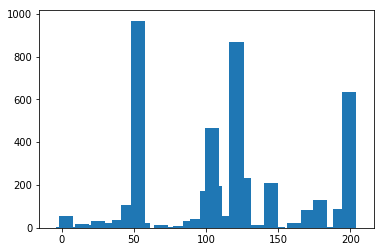

In [151]:
plt.bar(range(202),actual_error_scores_test,10)

<Container object of 202 artists>

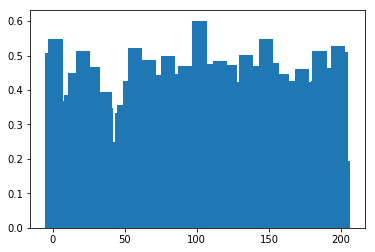

In [152]:
plt.bar(range(202),test_rmse,10)

In [ ]:
%%time
lag =  3
# model parameters
num_neurons = 50 #24
batch_size = 1  # this forces the lstm to step through each time-step one at a time
batch_input_shape=(batch_size, 1, lag)
dropout_rate =0.2
# instantiate a sequential model
model = Sequential()
model.add(Conv1D(filters=num_neurons,batch_size=1, kernel_size=3, 
                 strides=3, 
                 padding="same",activation='linear',dilation_rate=1, 
                 input_shape=(1, 3),data_format='channels_first'))
model.add(MaxPooling1D(pool_size=3,strides=3, padding="same"))
model.add(Dropout(dropout_rate))
model.add(Conv1D(filters=num_neurons,batch_size=1, kernel_size=3, 
                 strides=3, 
                 padding="same",activation='linear',dilation_rate=1, 
                 input_shape=(1, 3),data_format='channels_first'))
model.add(MaxPooling1D(pool_size=3,strides=3, padding="same"))
model.add(LSTM(units=num_neurons, 
              batch_input_shape=batch_input_shape, return_sequences=False,# as we only want last hidden output 
              stateful=True))
model.add(Dense(16,activation='linear'))
#model.add(Dense(18,activation='linear'))
model.add(Dense(1,activation='linear'))
from keras import optimizers
adam = optimizers.Adam(lr=0.01, decay=0.01)
model.compile(loss='mean_squared_error', optimizer=adam)

#run the model on merged clusters data
i=0
train_rmse =[]
test_rmse = []
actual_train_rmse = []
actual_error_scores_test = list()


for cust_id, cust_data in clust_5_data.groupby('client_debtor_number'):
    print ("customer number ",i)
    i=i+1
    #train_x = cust_data[cust_data['dates'].str.contains('/2018') == False]
    #test_x = cust_data[cust_data['dates'].str.contains('/2018') == True]
    train_x = cust_data[cust_data['dates'].dt.year != 2018]
    test_x = cust_data[cust_data['dates'].dt.year == 2018]
    train_x_cust,train_y_cust, scalar_train = prepare_training_data(train_x['fv_cost'], 3)
    test_x_cust,test_y_cust,scalar_test = prepare_training_data(test_x['fv_cost'], 3)  
    model.fit(train_x_cust, train_y_cust, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)
    # input size should be divisible by batch size for stateful LSTM
    trainScore = model.evaluate(train_x_cust, train_y_cust, batch_size=1, verbose=2)
    #print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
    testScore = model.evaluate(test_x_cust, test_y_cust, batch_size=1, verbose=2)
    #print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    #print('unscaled test score %f MSE' %(scaler.inverse_transform(testScore)))
    train_rmse.append(trainScore)
    test_rmse.append(testScore)
    # generate predictions for training
    trainPredict = model.predict(train_x_cust,batch_size=1)
    testPredict = model.predict(test_x_cust,batch_size=1)
    yhat_act_test = scalar_test.inverse_transform(testPredict)
    # report performance
    rmse_test = sqrt(mean_squared_error(test_x.fv_cost[-(len(yhat_act_test)):], yhat_act_test))
    print(cust_id," Test RMSE: ",rmse_test)
    actual_error_scores_test.append(rmse_test)
    yhat_act_train = scalar_train.inverse_transform(trainScore)
    rmse_train = sqrt(mean_squared_error(train_x.fv_cost[-(len(yhat_act_train)):],yhat_act_train))
    actual_train_rmse.append(rmse_train)
    # write predictions into csv
    result_prediction = pd.DataFrame()#, original_fv : test_y_cust, prediction_fv :testPredict})
    #result_prediction['dates'] = test_x['dates']
    result_prediction['original_fv_scaled'] = test_y_cust
    result_prediction['prediction_scaled'] = testPredict
    result_prediction['prediction_actual'] = yhat_act_test
    result_prediction['fv_actual'] = test_x.fv_cost[-(len(yhat_act_test)):]
    #result_prediction.to_csv("predictions_1000_customers/predictions_for_client_"+str(cust_id)+".csv")
    model.reset_states()

customer number  0
Epoch 1/10
 - 16s - loss: 0.0333
Epoch 2/10
 - 15s - loss: 0.0380
Epoch 3/10
 - 14s - loss: 0.0508
Epoch 4/10
 - 13s - loss: 0.0146
Epoch 5/10
 - 13s - loss: 0.0094
Epoch 6/10
 - 12s - loss: 0.0099
Epoch 7/10
 - 13s - loss: 0.0079
Epoch 8/10
 - 12s - loss: 0.0083
Epoch 9/10
 - 13s - loss: 0.0084
Epoch 10/10
 - 12s - loss: 0.0085
7755945  Test RMSE:  0.031085223276610303
customer number  1
Epoch 1/10
 - 11s - loss: 0.0149
Epoch 2/10
 - 11s - loss: 0.0118
Epoch 3/10
 - 11s - loss: 0.0111
Epoch 4/10
 - 11s - loss: 0.0109
Epoch 5/10
 - 11s - loss: 0.0095
Epoch 6/10
 - 10s - loss: 0.0097
Epoch 7/10
 - 10s - loss: 0.0089
Epoch 8/10
 - 11s - loss: 0.0087
Epoch 9/10
 - 11s - loss: 0.0090
Epoch 10/10
 - 11s - loss: 0.0090
7762445  Test RMSE:  0.26077138370130337
customer number  2
Epoch 1/10
 - 10s - loss: 0.0217
Epoch 2/10
 - 11s - loss: 0.0111
Epoch 3/10
 - 10s - loss: 0.0104
Epoch 4/10


In [ ]:
plt.bar(range(131),test_rmse,10)

In [ ]:
plt.bar(range(131),sorted(test_rmse,reverse=True),1)

In [177]:
import numpy as np

#bins = create_bins(lower_bound=0,width=0.05,quantity=8)
bins = [0, 0.8]
hist, bin_edges = np.histogram(test_rmse, bins=bins)
hist, bin_edges = np.histogram(test_rmse, bins=30)
print (hist)
print (bin_edges)
df_binedges = pd.DataFrame()

#create dataframe with bin values
for i in range(len(hist)):
    df_binedges.at[i,'binedge_1'] = float(bin_edges[i])
    df_binedges.at[i,'binedge_2'] = float(bin_edges[i+1])
    df_binedges.at[i,'count'] = hist[i]

df_binedges

[22  5 10 17 11 13 12  4  4  5  5  2  2  2  1  6  0  0  1  2  3  0  0  1
  0  1  1  0  0  1]
[2.52281607e-05 6.06292540e-03 1.21006226e-02 1.81383199e-02
 2.41760171e-02 3.02137144e-02 3.62514116e-02 4.22891089e-02
 4.83268061e-02 5.43645033e-02 6.04022006e-02 6.64398978e-02
 7.24775951e-02 7.85152923e-02 8.45529895e-02 9.05906868e-02
 9.66283840e-02 1.02666081e-01 1.08703779e-01 1.14741476e-01
 1.20779173e-01 1.26816870e-01 1.32854567e-01 1.38892265e-01
 1.44929962e-01 1.50967659e-01 1.57005356e-01 1.63043054e-01
 1.69080751e-01 1.75118448e-01 1.81156145e-01]


,binedge_1,binedge_2,count
0,0.000025,0.006063,22.0
1,0.006063,0.012101,5.0
2,0.012101,0.018138,10.0
3,0.018138,0.024176,17.0
4,0.024176,0.030214,11.0
5,0.030214,0.036251,13.0
6,0.036251,0.042289,12.0
7,0.042289,0.048327,4.0
8,0.048327,0.054365,4.0
9,0.054365,0.060402,5.0
